This data comes from the Surveillance Atlas of Infections Diseases (European Centre for Disease Prevenction and Control - ECDC) and covers the 2005-2021 time interval for all countries in the European Economic Area (EEA), meaning all countries in the European Union (EU) plus Iceland, Liechtenstein, and Norway. 

<i>(I) Data pre-processing</i>

In [1]:
# Importing the relevant libraries
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

###

In [2]:
# Defining the paths
acinetobacter = r"C:/Users/franc/resistance_capstone/Antibiotics/Acinetobacter"
escherichia_coli = r"C:/Users/franc/resistance_capstone/Antibiotics/Escherichia_coli"
klebsiella_pneumoniae= r"C:/Users/franc/resistance_capstone/Antibiotics/Klebsiella_pneumoniae"
pseudomonas_aeruginosa= r"C:/Users/franc/resistance_capstone/Antibiotics/Pseudomonas_aeruginosa"

# List of paths
paths = [acinetobacter, escherichia_coli, klebsiella_pneumoniae, pseudomonas_aeruginosa]


In [3]:
# Getting the list of files on each folder
for folder in paths:
    file_list= os.listdir(folder)
    print(f'Files in {os.path.basename(folder)}: {file_list}')


Files in Acinetobacter: ['totalisolated_2005_2021_amynoglycosides.csv', 'totalisolated_2005_2021_carbapenems.csv', 'totalisolated_2005_2021_combinedresistance.csv', 'totalisolated_2005_2021_fluoroquinolones.csv']
Files in Escherichia_coli: ['totalisolated_2005_2021_3rdgencephalosporin.csv', 'totalisolated_2005_2021_aminoglycosides.csv', 'totalisolated_2005_2021_carbapanems.csv', 'totalisolated_2005_2021_combinedresistance.csv', 'totalisolated_2005_2021_fluoroquinolones.csv']
Files in Klebsiella_pneumoniae: ['totalisolated_2005_2021_3rdgencephalosporins.csv', 'totalisolated_2005_2021_aminoglycosides.csv', 'totalisolated_2005_2021_carbapennems.csv', 'totalisolated_2005_2021_combinedresistance.csv', 'totalisolated_2005_2021_fluoroquinolones.csv']
Files in Pseudomonas_aeruginosa: ['totalisolated_2005_2021_aminoglycosides.csv', 'totalisolated_2005_2021_carbapenems.csv', 'totalisolated_2005_2021_combinedresistance.csv', 'totalisolated_2005_2021_fluoroquinolones.csv']


In [4]:
# Append all data regarding each microorganism in one single csv
for folder in paths:
    file_list= os.listdir(folder)
    for file in file_list:
        # Combine all csv files
        combined_csv = pd.concat([pd.read_csv(os.path.join(folder, file)) for file in file_list])
        # Exporting new csv
        combined_csv.to_csv( f"combined_{os.path.basename(folder)}.csv", index=False, encoding='utf-8-sig')

In [5]:
# Getting the list of combined csv files
all_combined_csv = glob.glob('*.{}'.format('csv'))

def data_clean(file_name, string_to_remove):
    """"
    This function removes unnecessary columns and values from a specific csv file
    
    Input:
    file_name (str): The name of the file that the function will interact with
    string_to_remove (str): The redundant string to be removed from the Population column

    Output:
    df (Dataframe): The "treated" dataframe
    """
    # Load as df
    df = pd.read_csv(file_name)
    # Drop unnecessary columns: Unit is always "N", TxtValue is empty, RegionCode is redundant, and HealthTopic is always "Antimicrobial resistance"
    df_names_names = df.drop(columns=['Unit', 'TxtValue', 'HealthTopic', 'RegionCode'])
    # For the sake of keeping it relevant to the context of in development countries, this research will not include a country if HDI ≥ 9.0
    df = df[df.RegionName.isin(['Belgium','Norway', 'Iceland', 'Switzerland', 'Ireland', 'Germany', 'Denmark', 'Austria', 'Netherlands', 'Sweden', 'Finland', 'United Kingdom']) == False]
    # Remove the redundant name of pathogen
    df['Population'] = df['Population'].str.replace(string_to_remove, '', regex= True)
    # Rename column Population to resistant_to
    df.rename(columns = {'Population':'resistant_to'}, inplace = True)
    # Set the NumValue column to real num values for further plotting purposes
    df['NumValue'] = df['NumValue'].str.replace('-', '0', regex= True)
    df['NumValue'] = df['NumValue'].astype(float)
    return df

# All strings that must be removed
strings_to_remove= ['Acinetobacter spp.\|', 'Escherichia coli\|', 'Klebsiella pneumoniae\|', 'Pseudomonas aeruginosa\|'] 

# Defining each scaled_df df
for index, item in enumerate(all_combined_csv):
    # Removing .csv to name the df
    globals()[f'df_{os.path.basename(item)[:-4]}']= data_clean(item, strings_to_remove[index])


It is important to understand the jargon present in the data. Basically, there are three possible values for indicators: R - resistant isolates, I - susceptible, increased exposure, and S - susceptible isolates.
[The European Commitee on Antimicrobial Susceptibility Testing (EUCAST-2019)](https://www.eucast.org/newsiandr#:~:text=I%20%2D%20Susceptible%2C%20increased%20exposure*%3A,at%20the%20site%20of%20infection.) defines each one of those as the following: <br>
<ul>
<li>R - resistant isolates: even with increased exposure to the antimicrobial, it is very likely the pathogens will not disappear. </li>
<li>I- susceptible, increased exposure: there is a high chance of therapeutic success once the pathogen is exposed to higher concentrations of the antimicrobial.</li>
<li>S - susceptible isolates: pathogen is suscetible to disappear with standard doses of the antimicrobial </li>


</ul>

C:\Users\franc\AppData\Local\Temp\ipykernel_17888\2212579401.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(15, 10))


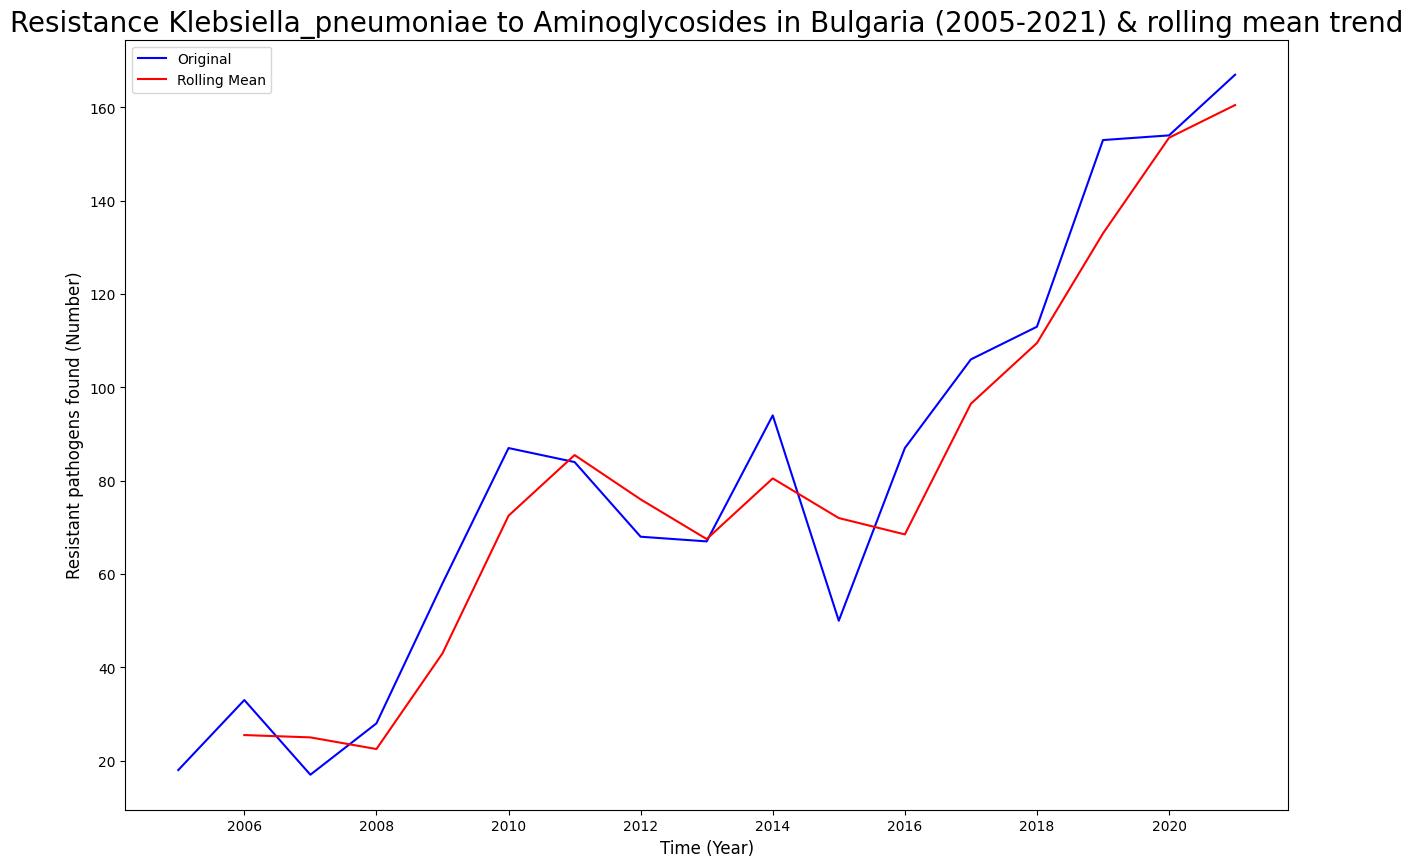

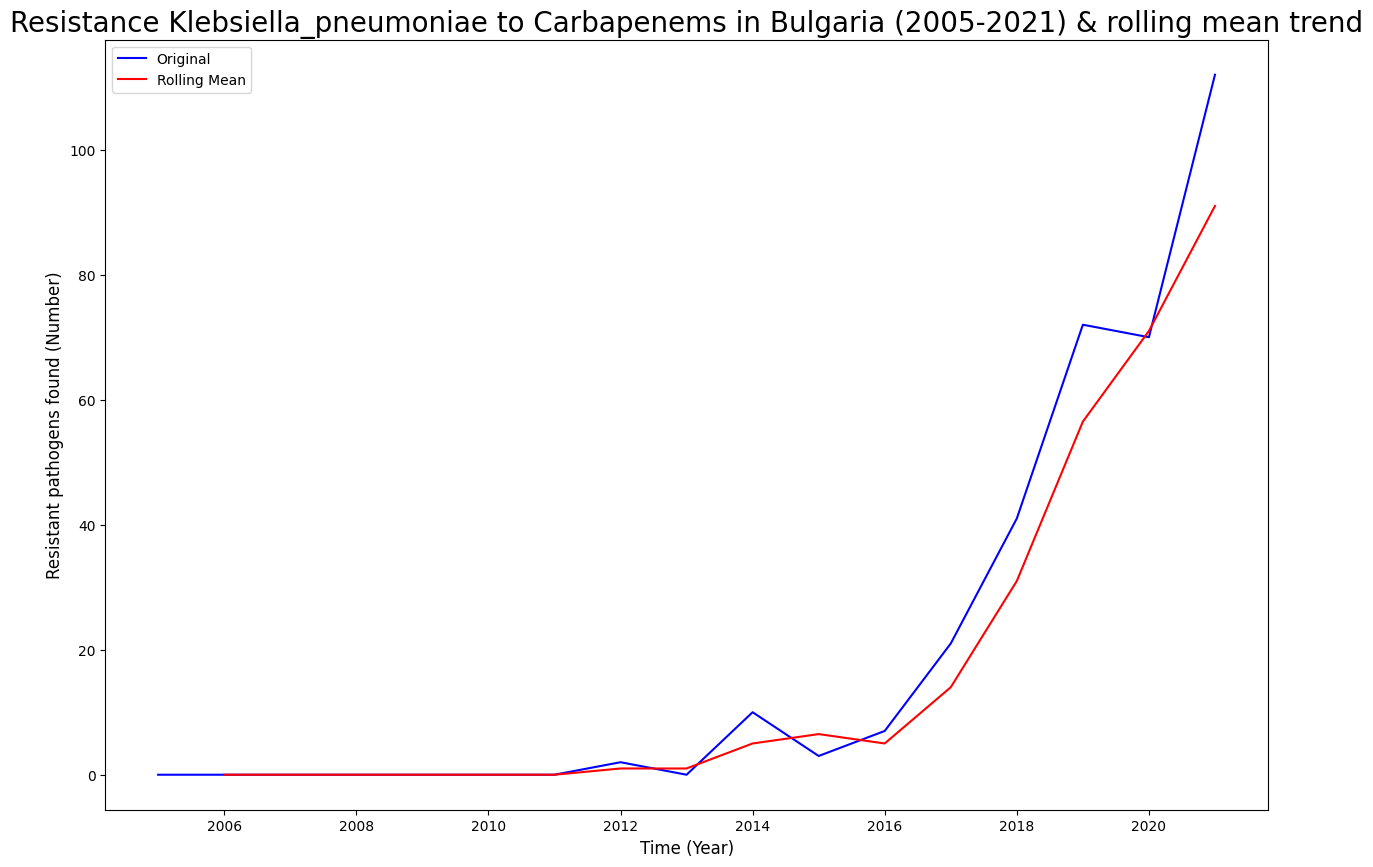

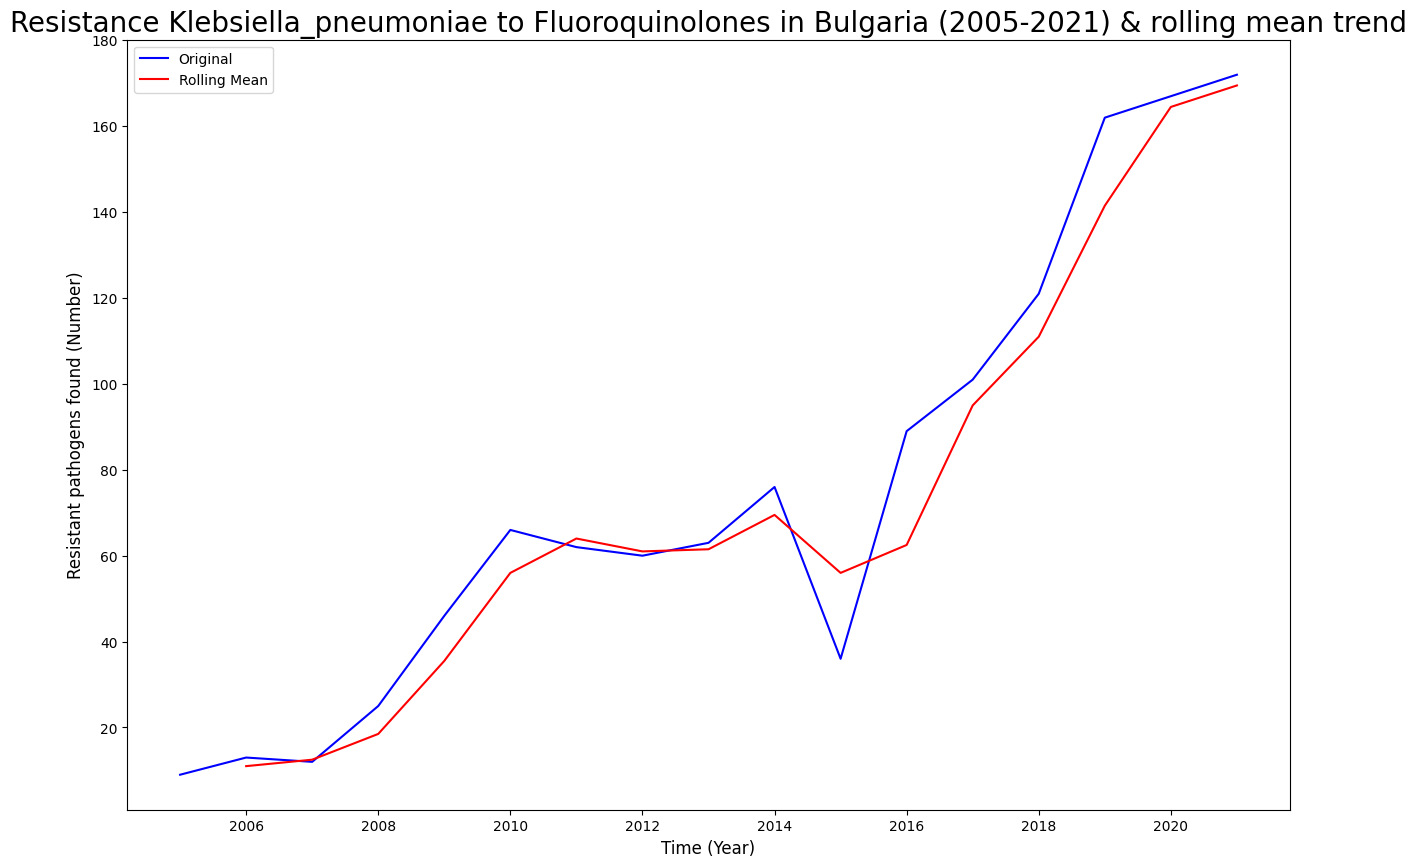

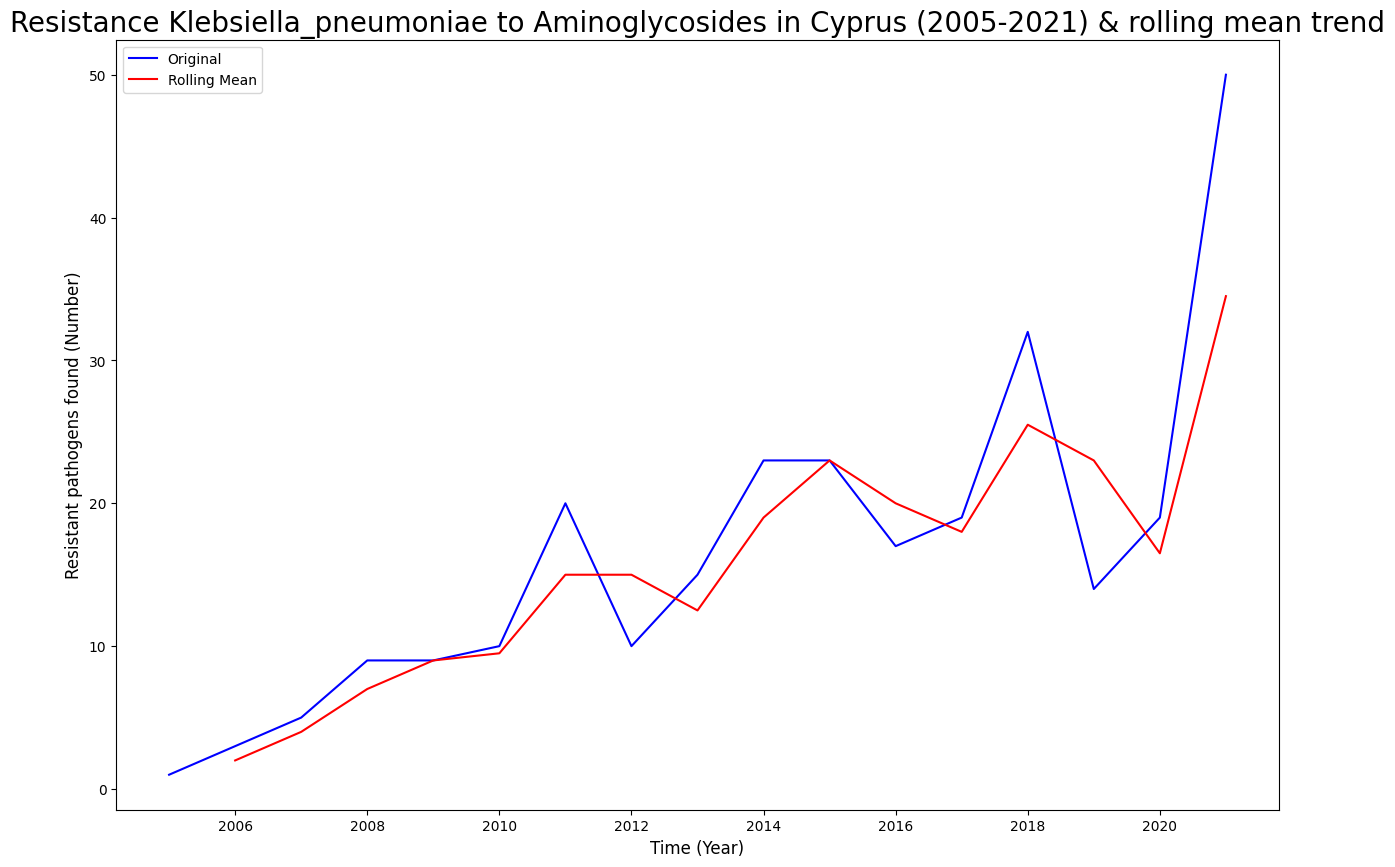

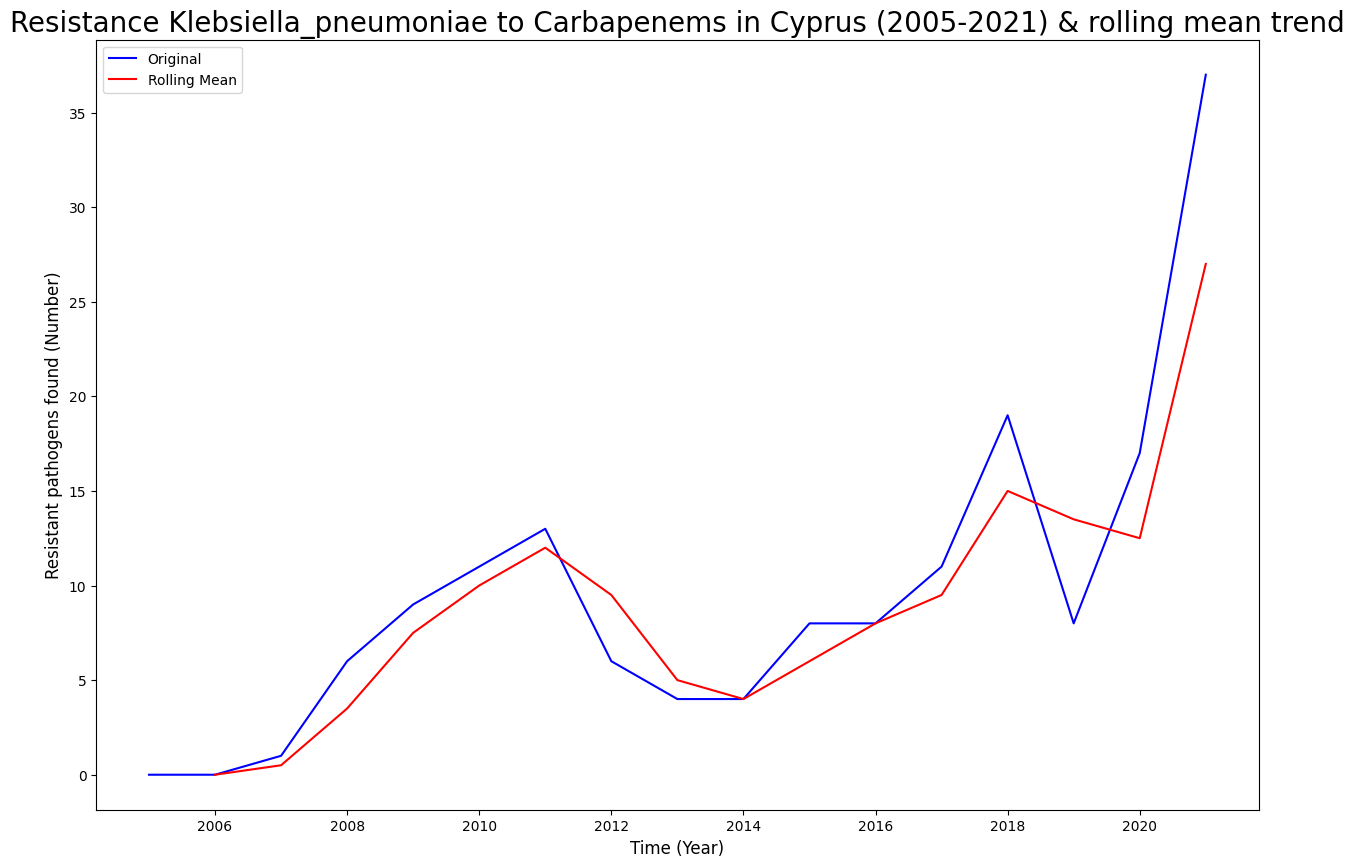

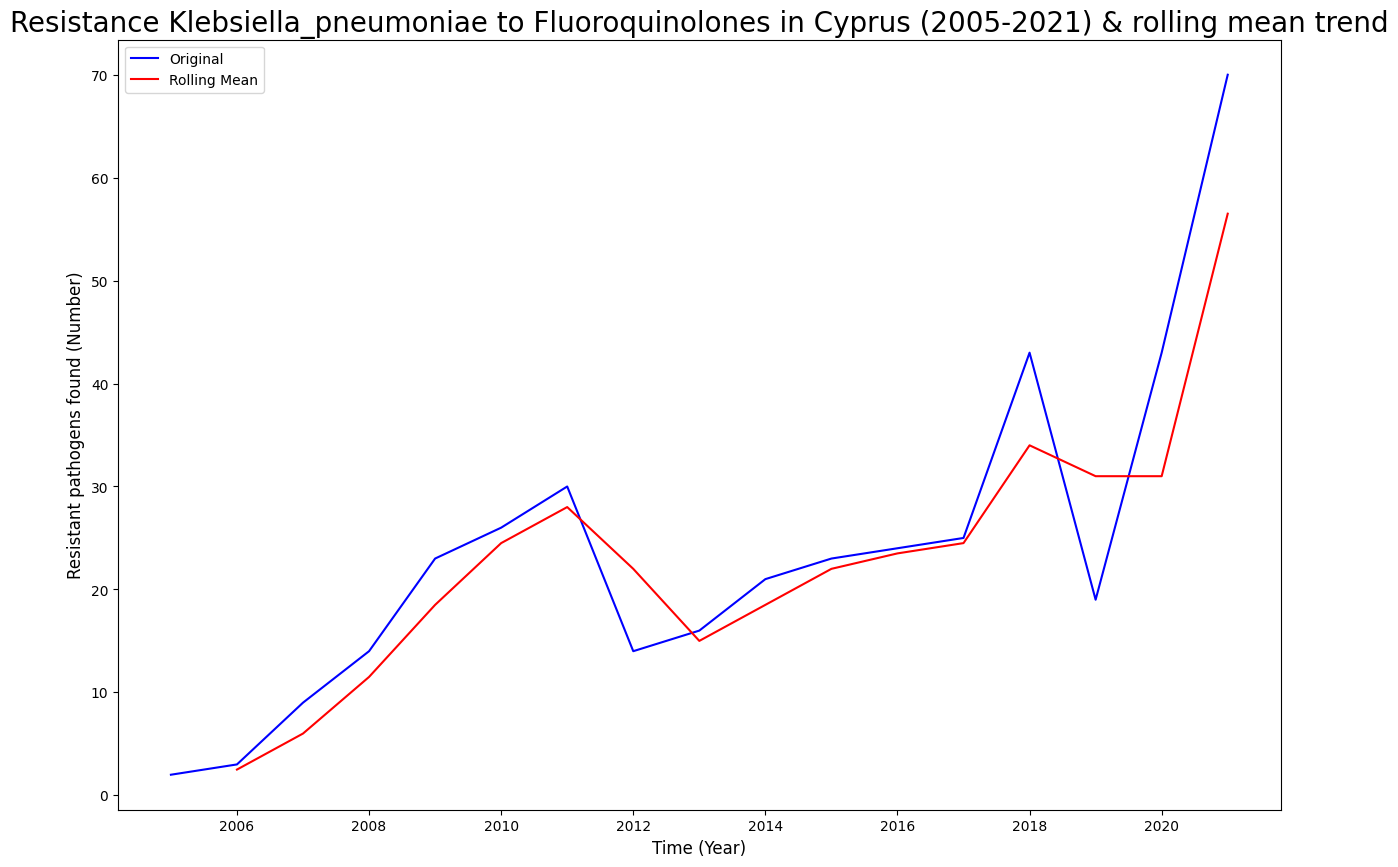

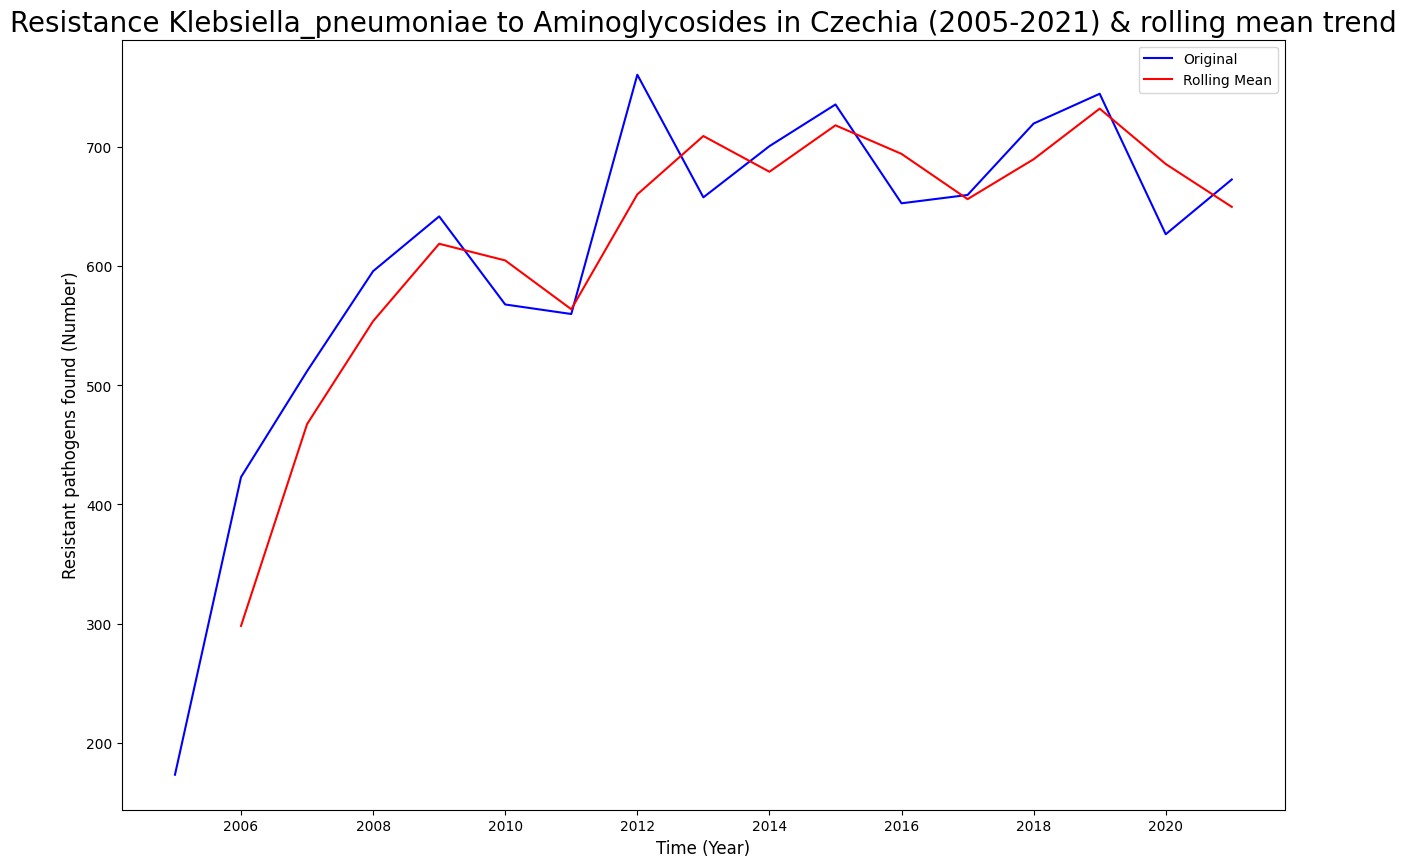

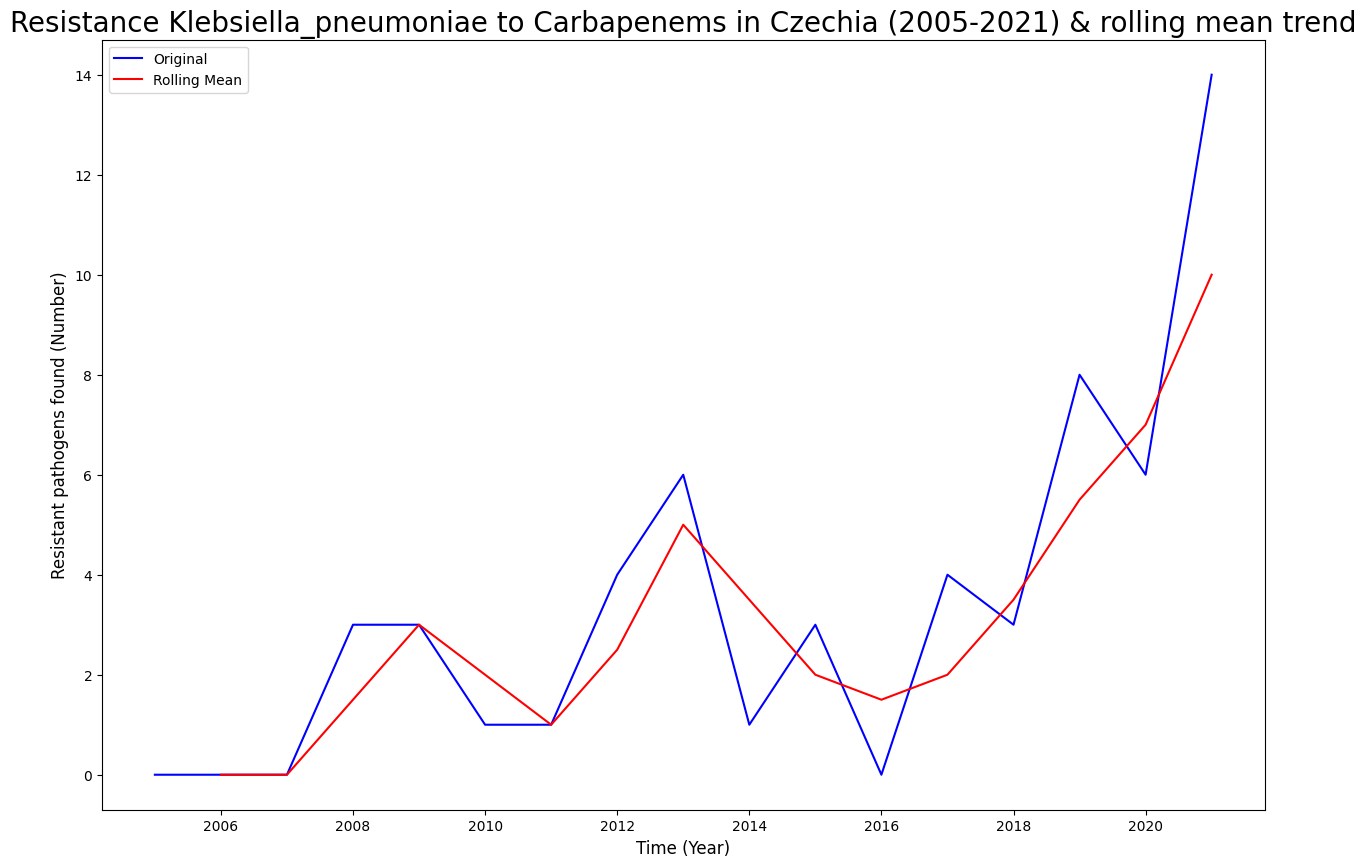

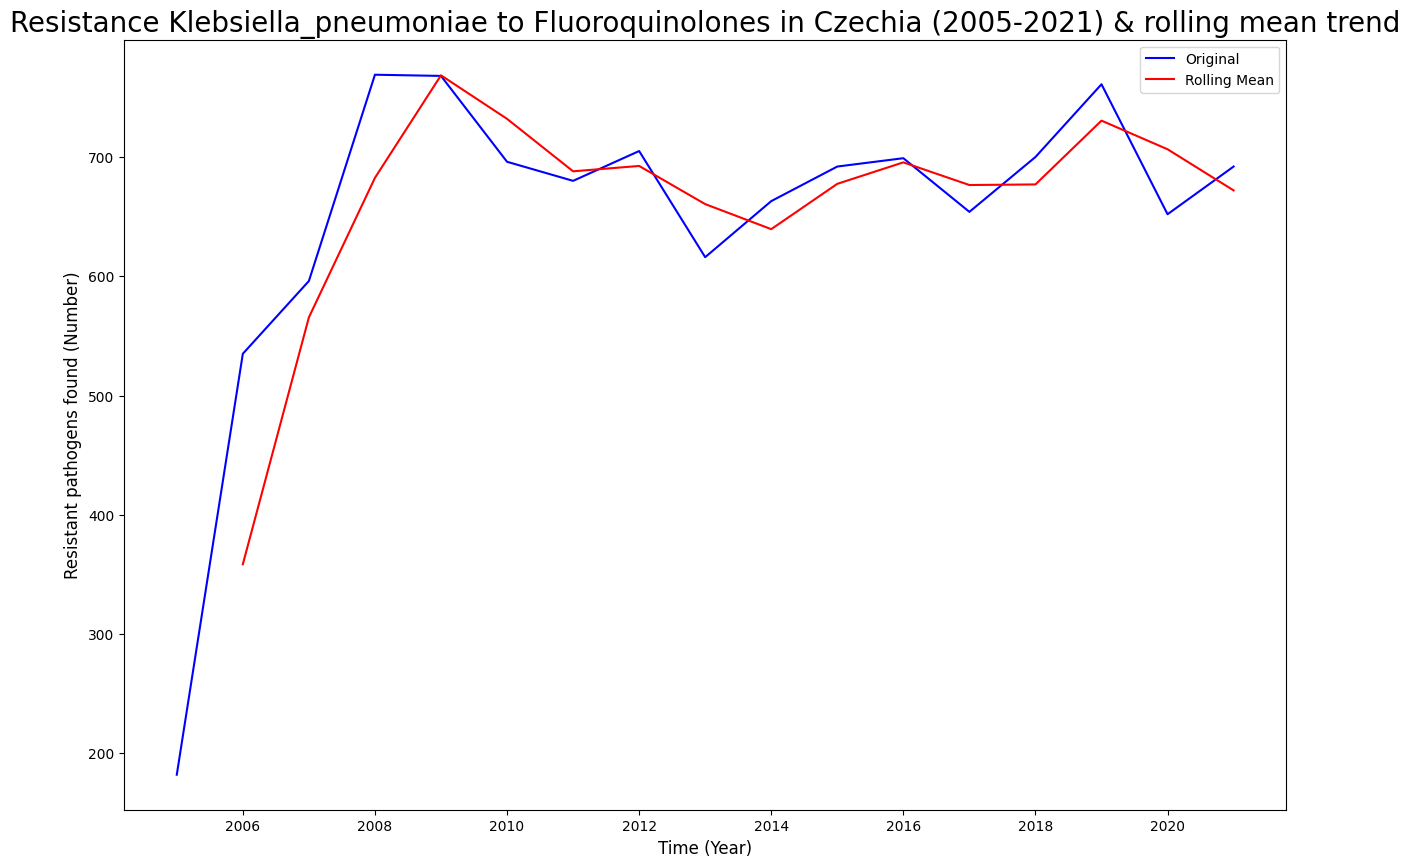

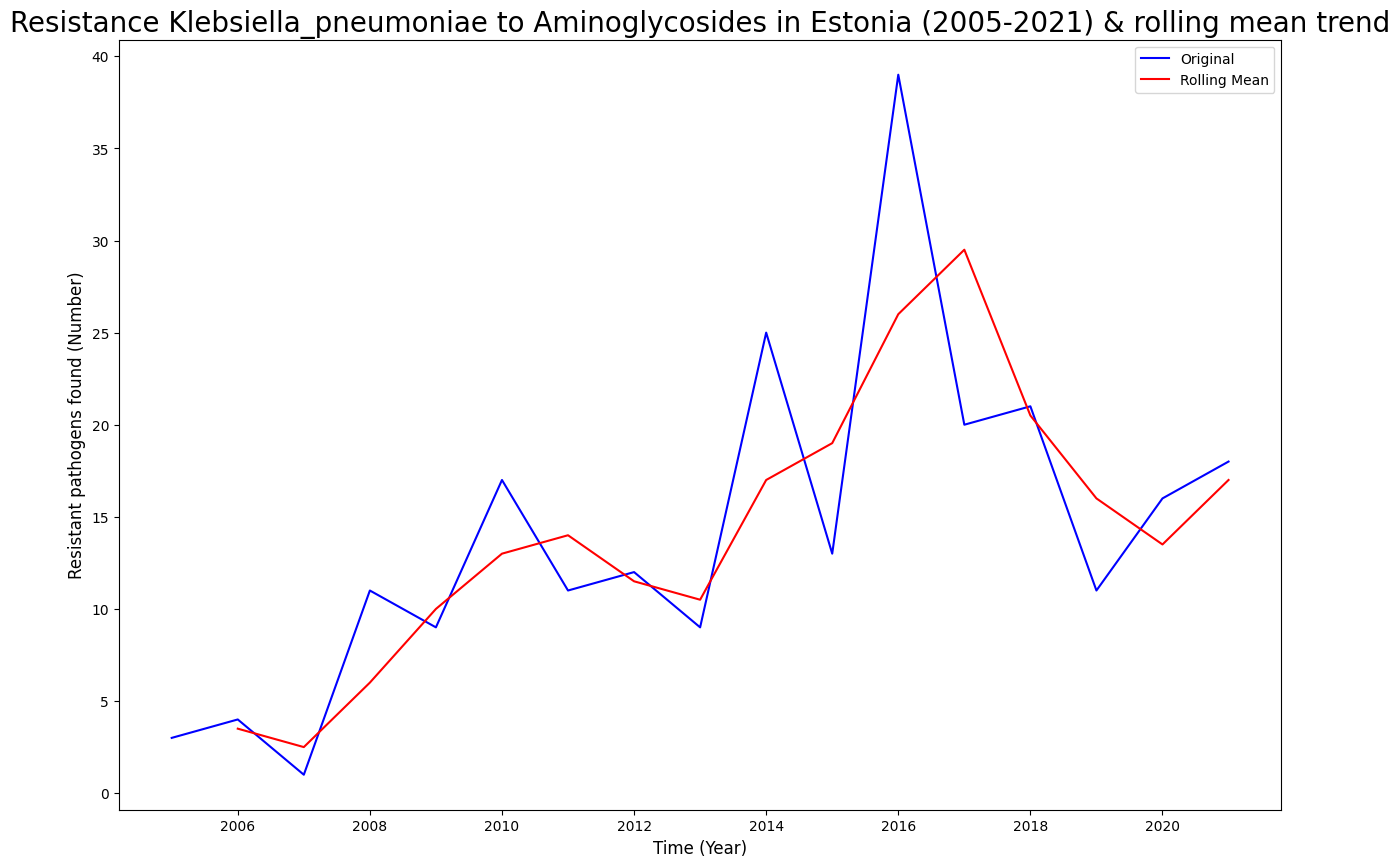

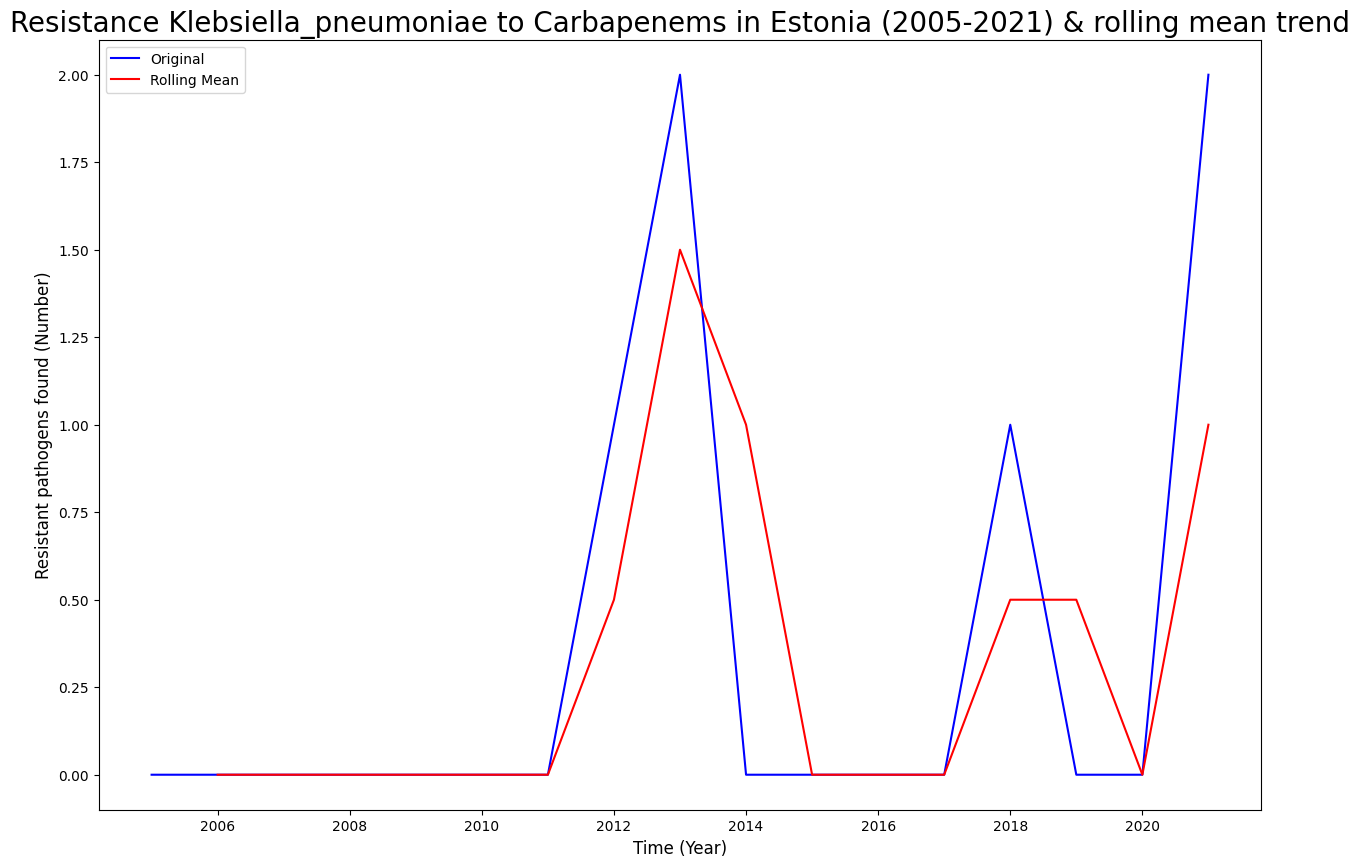

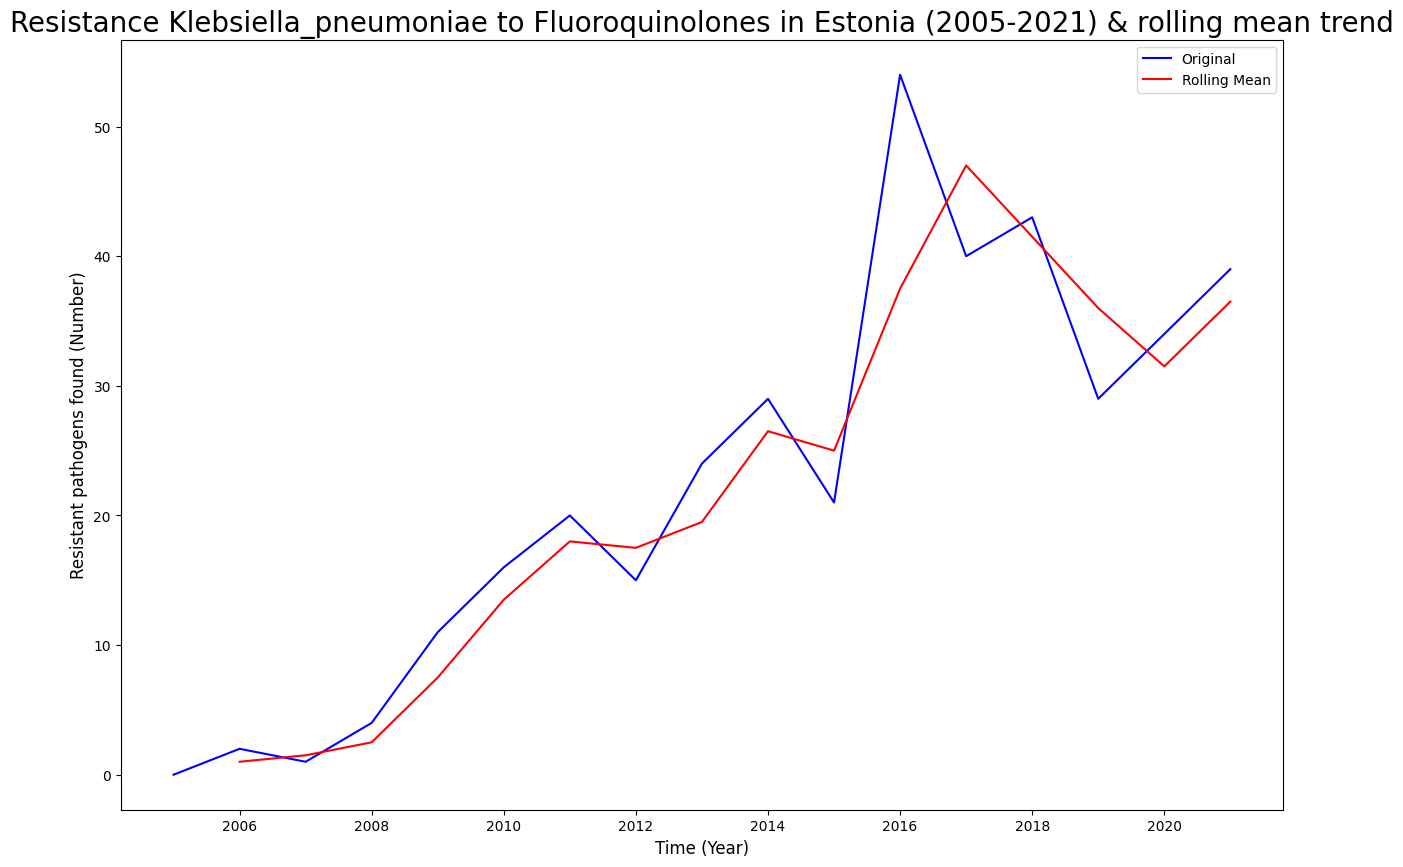

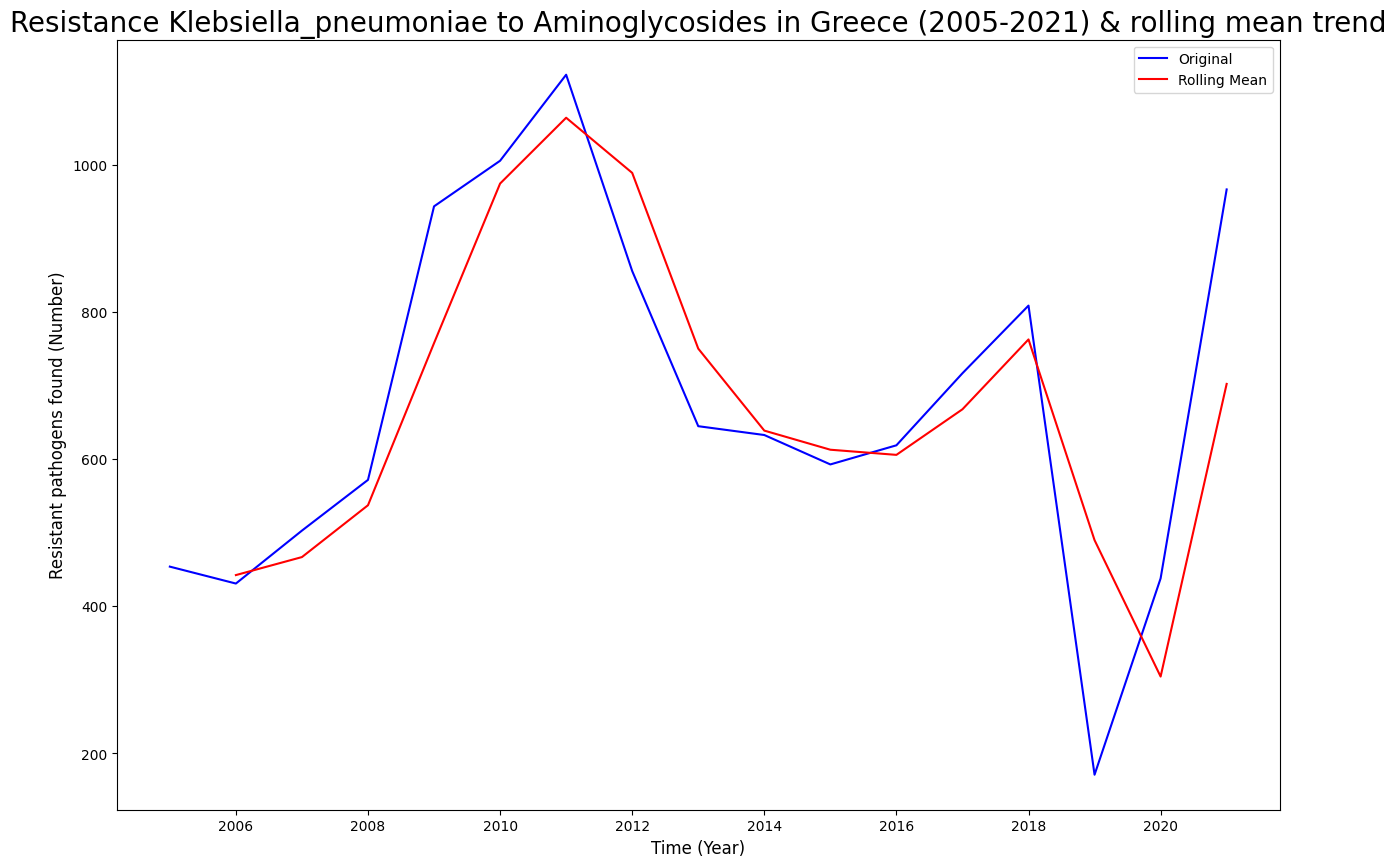

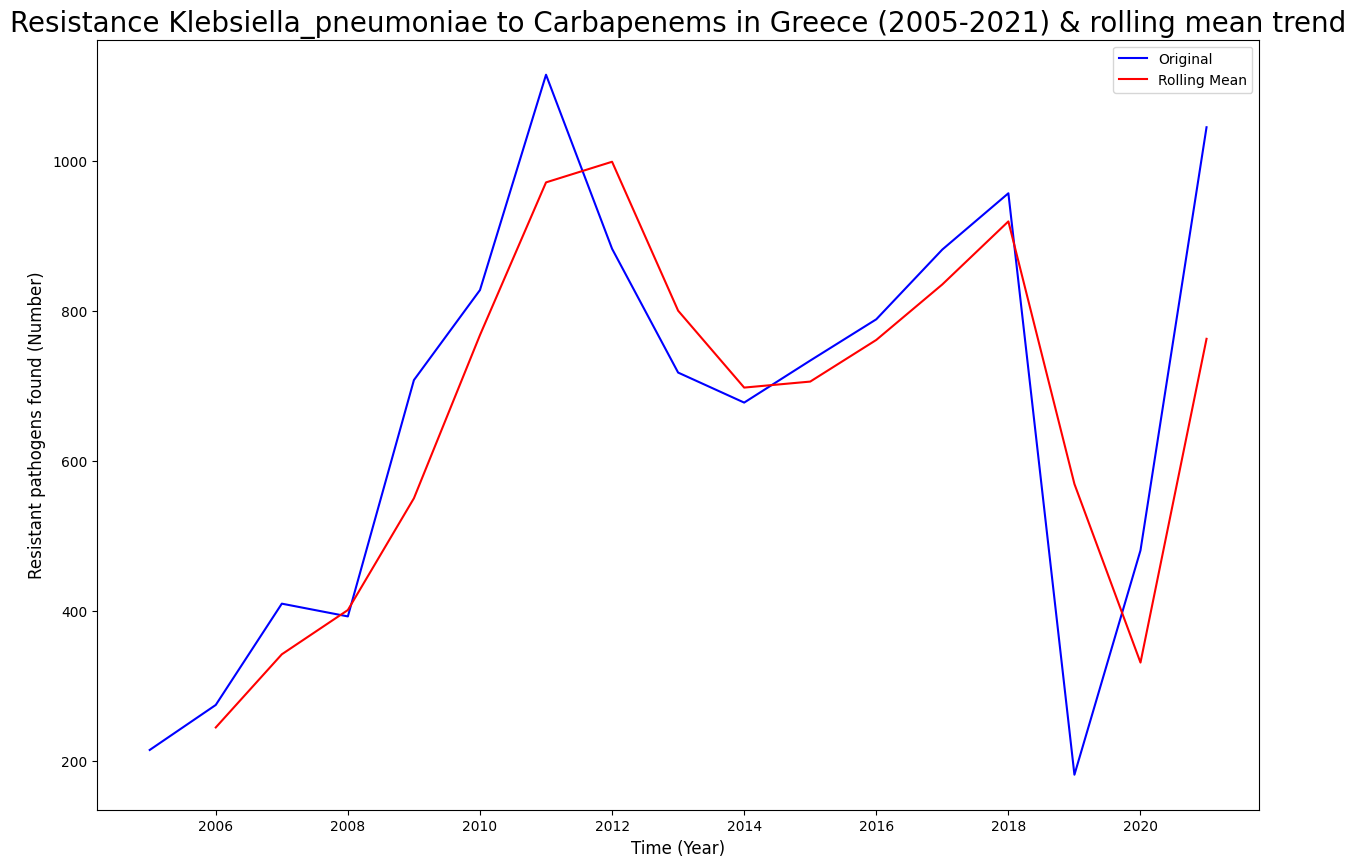

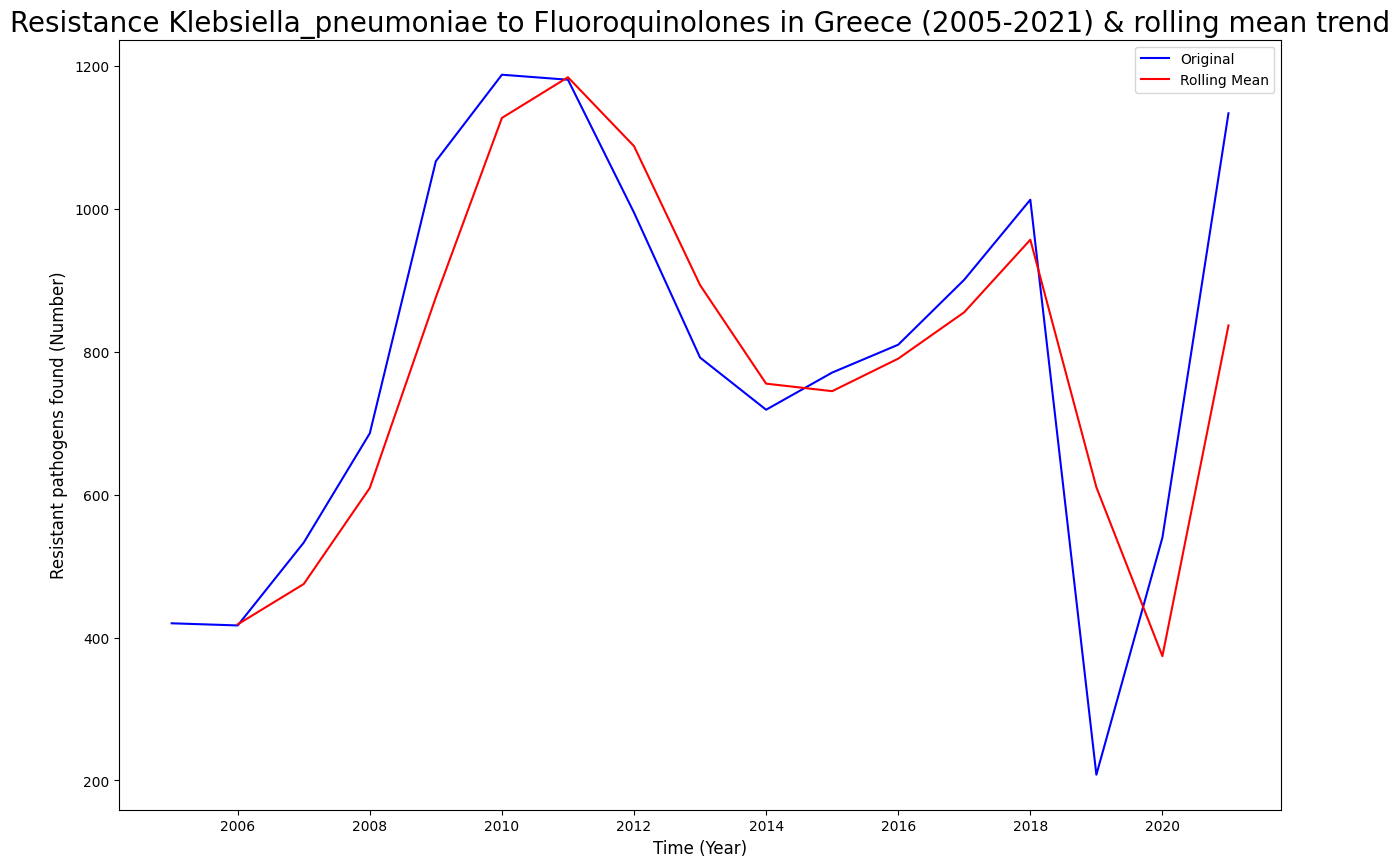

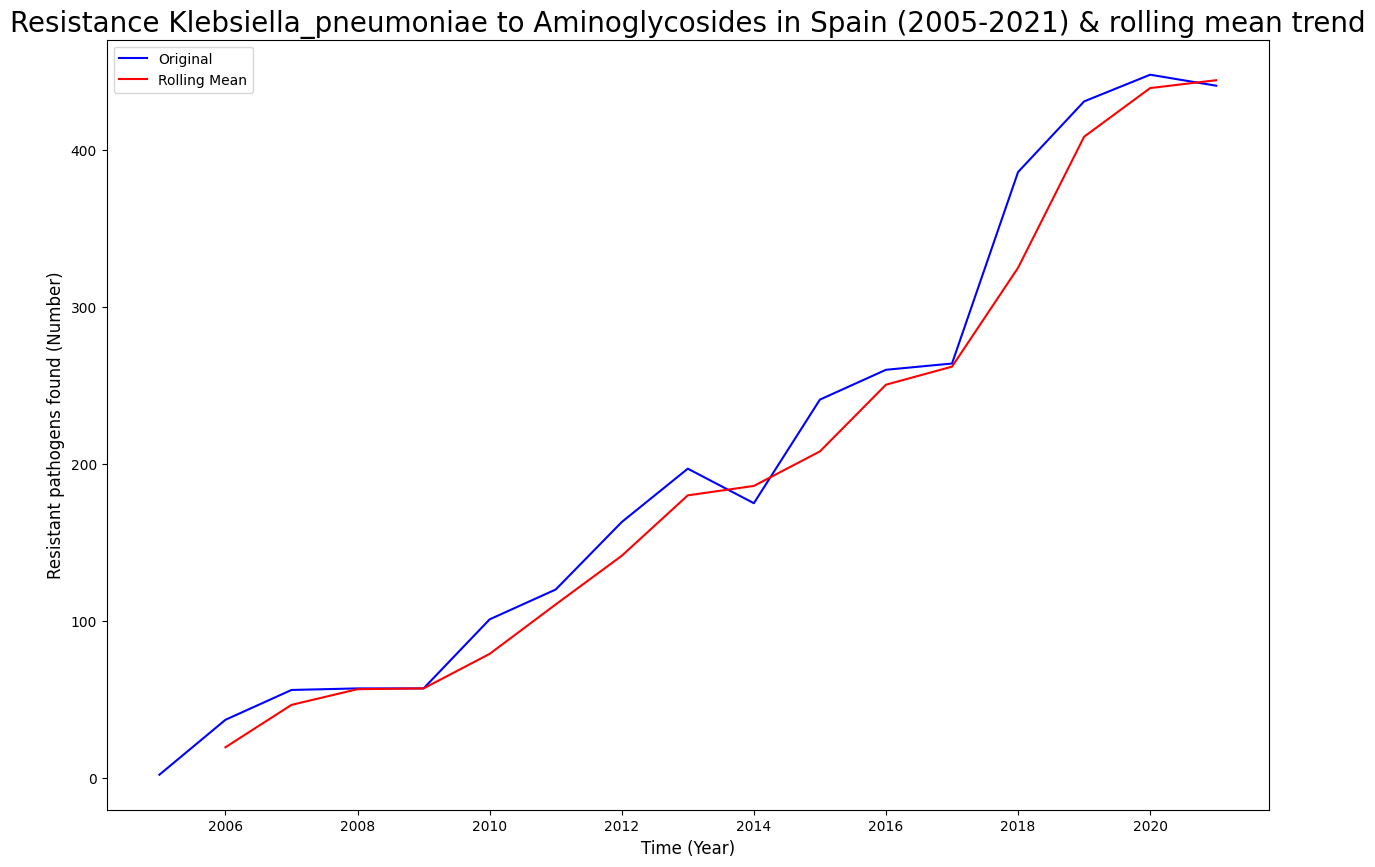

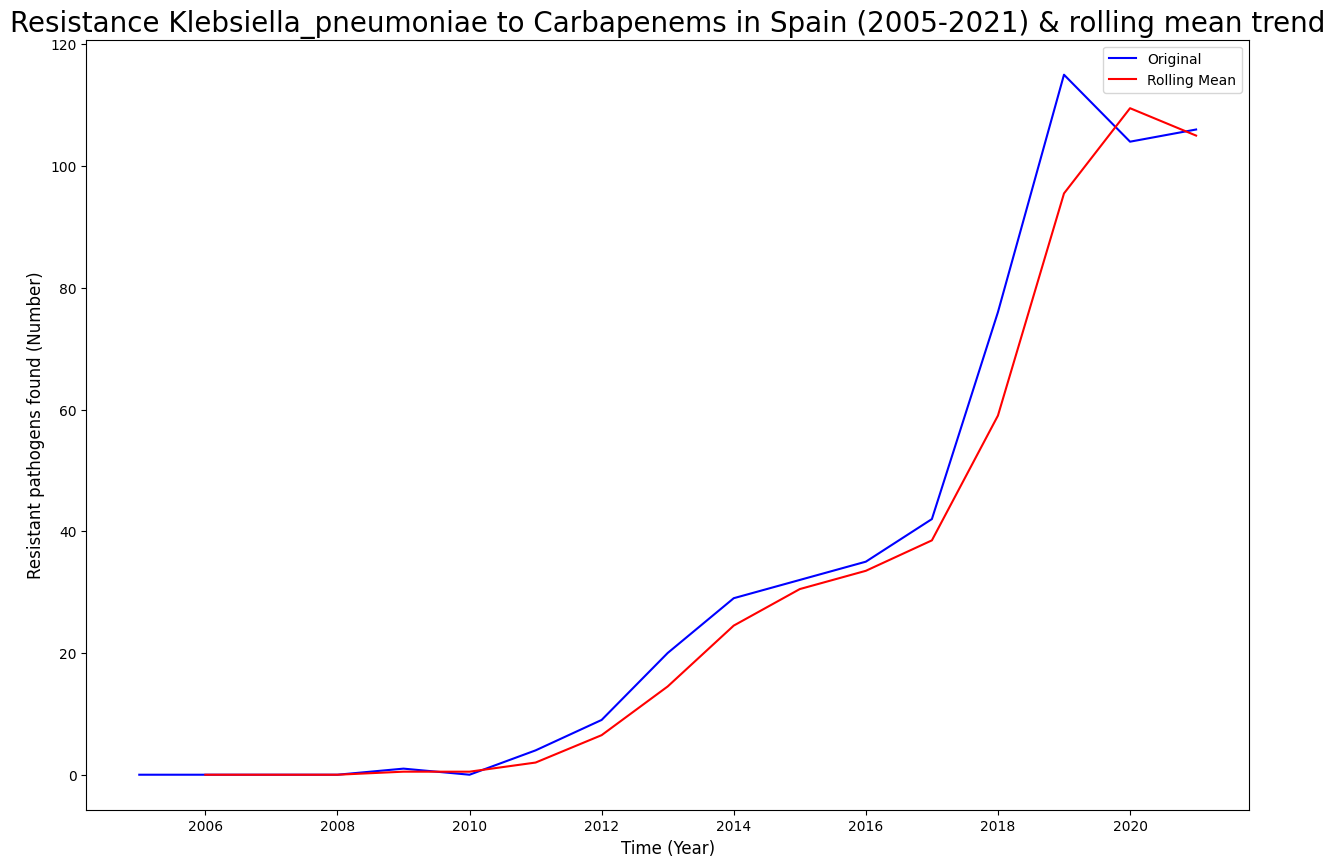

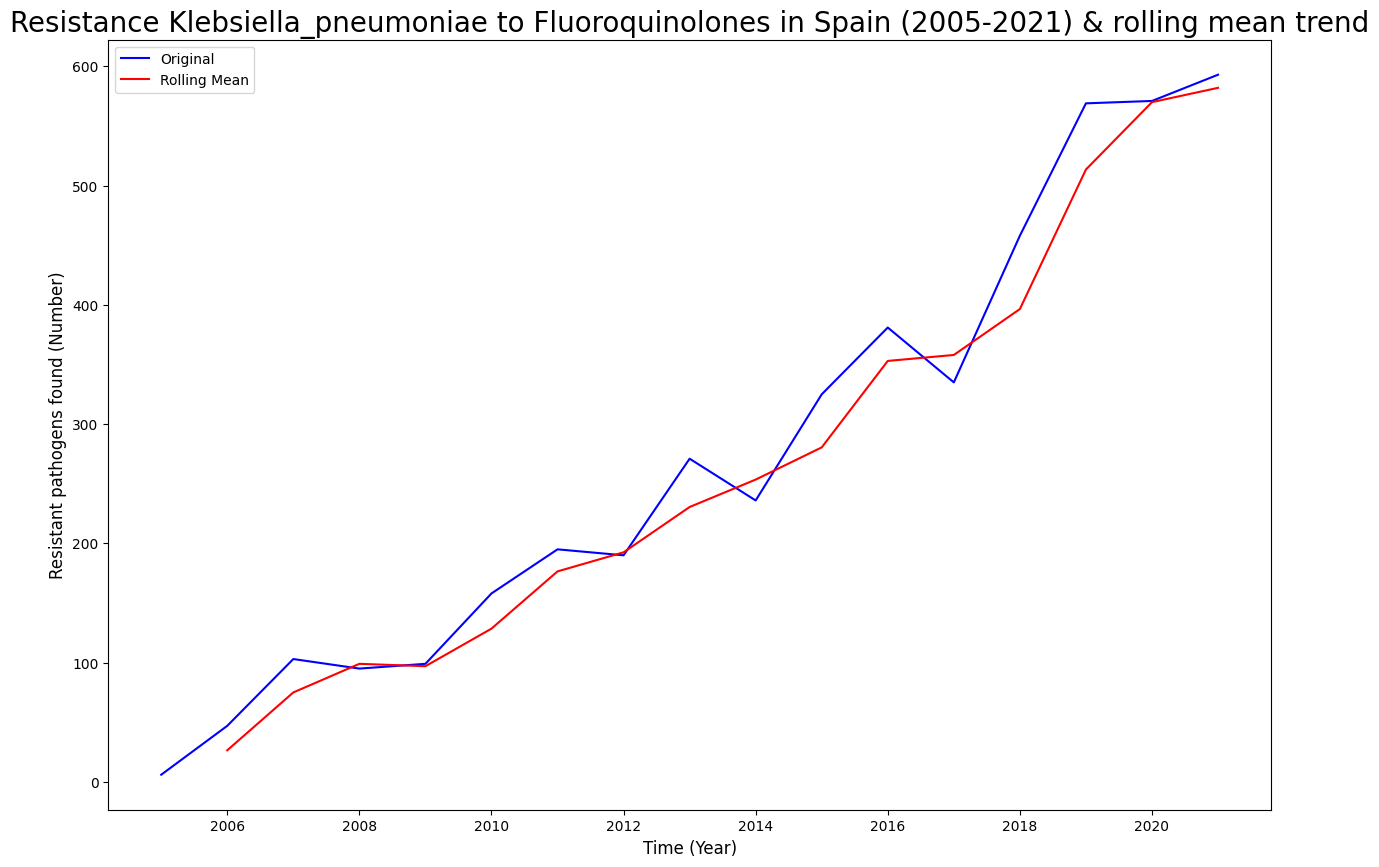

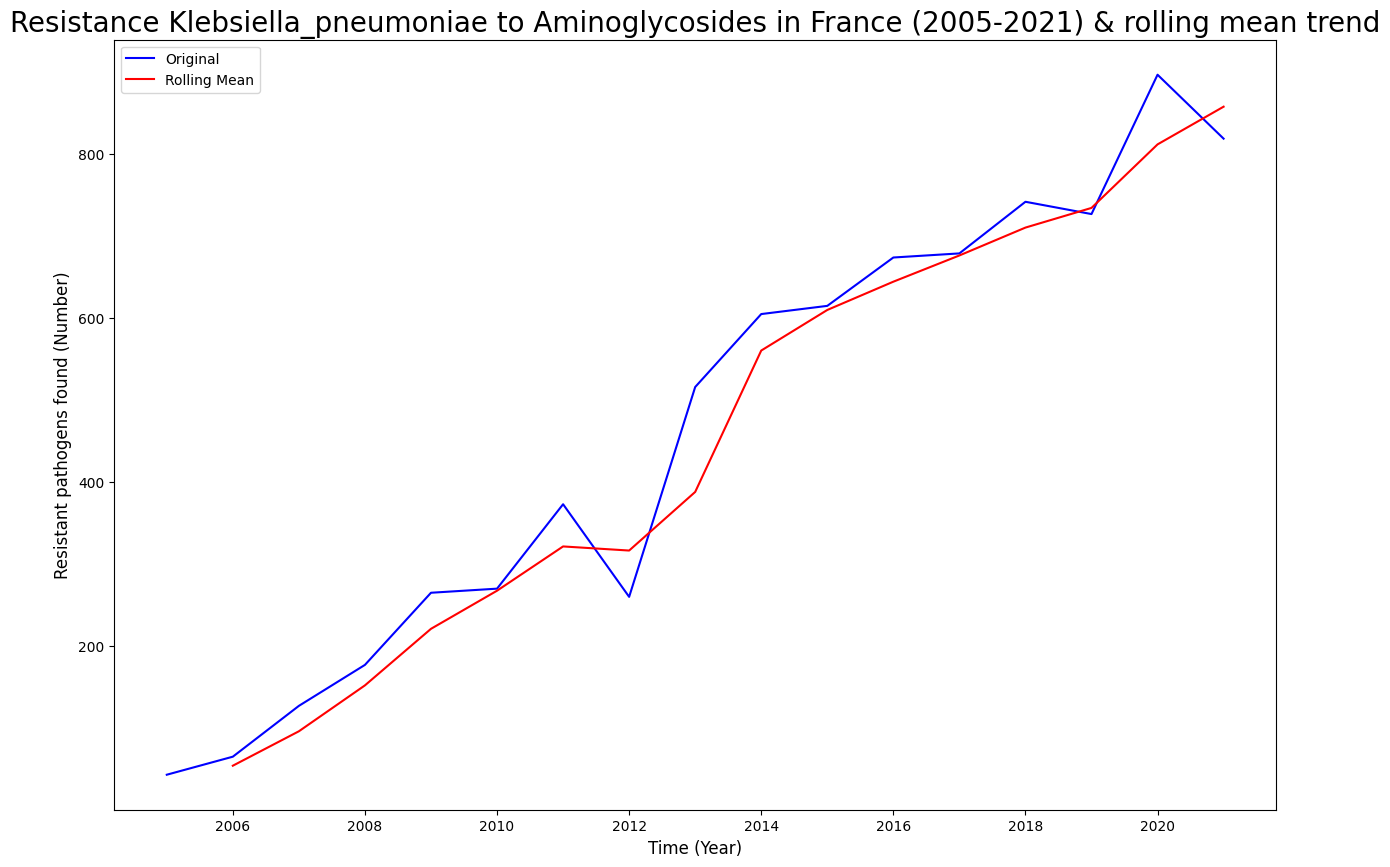

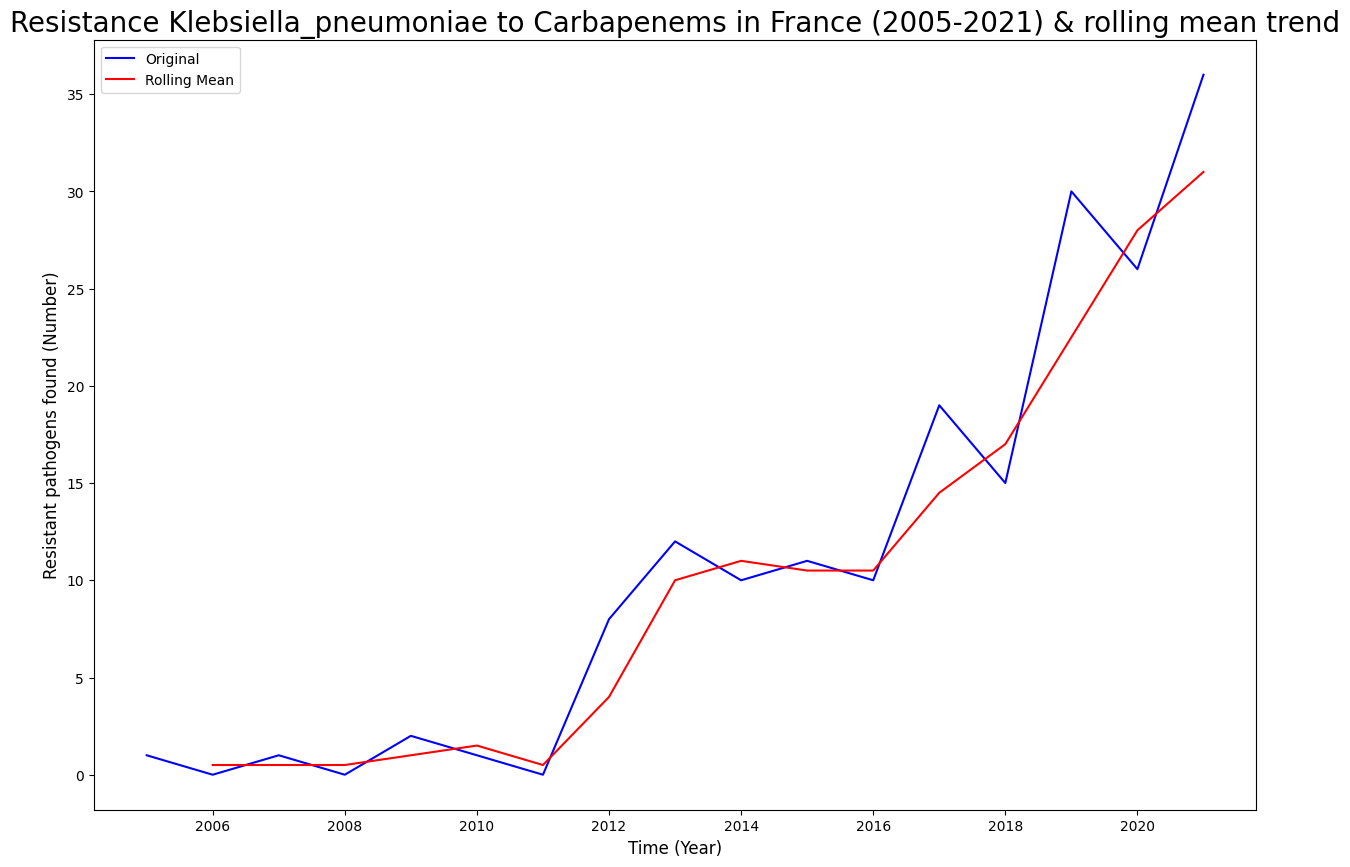

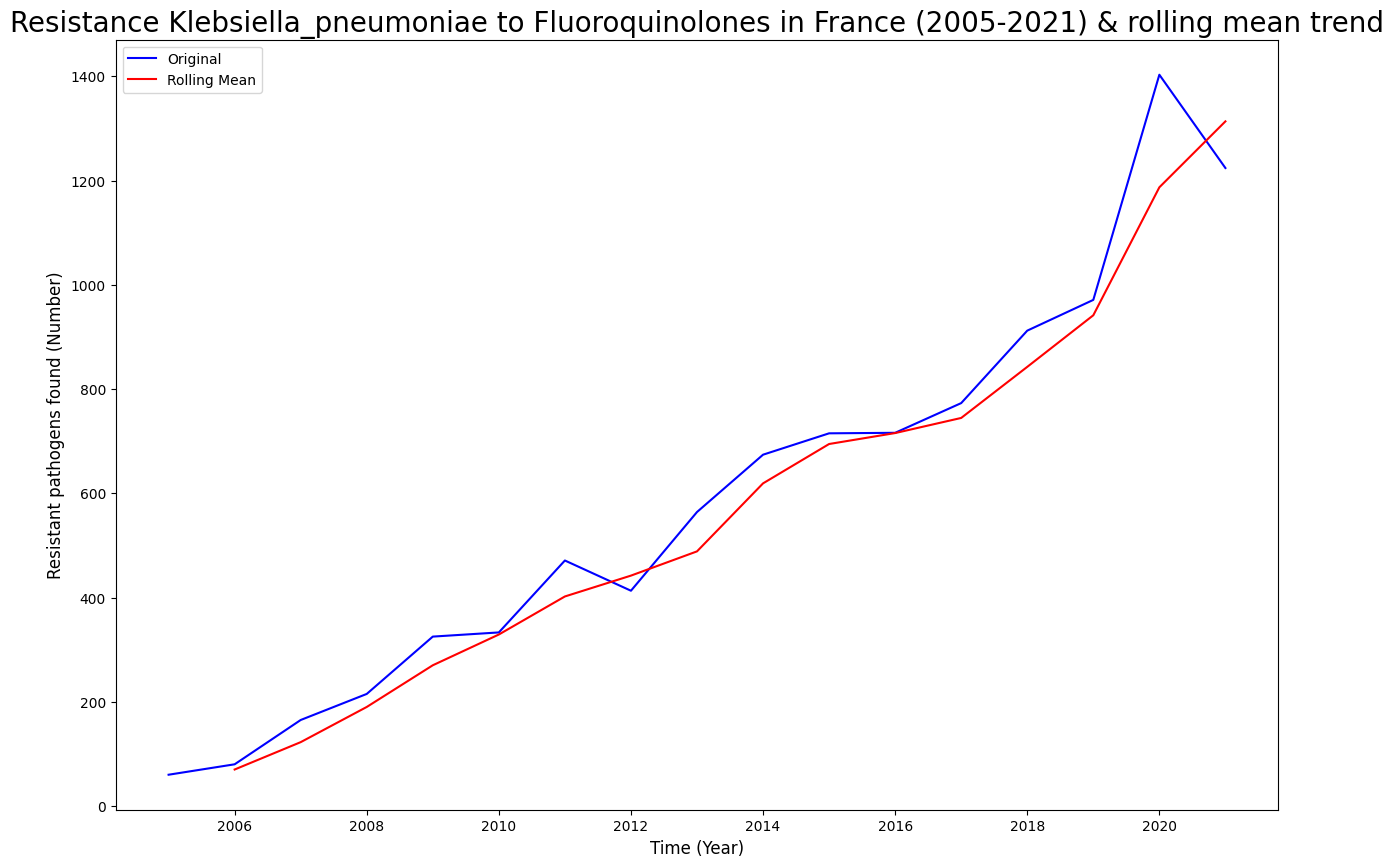

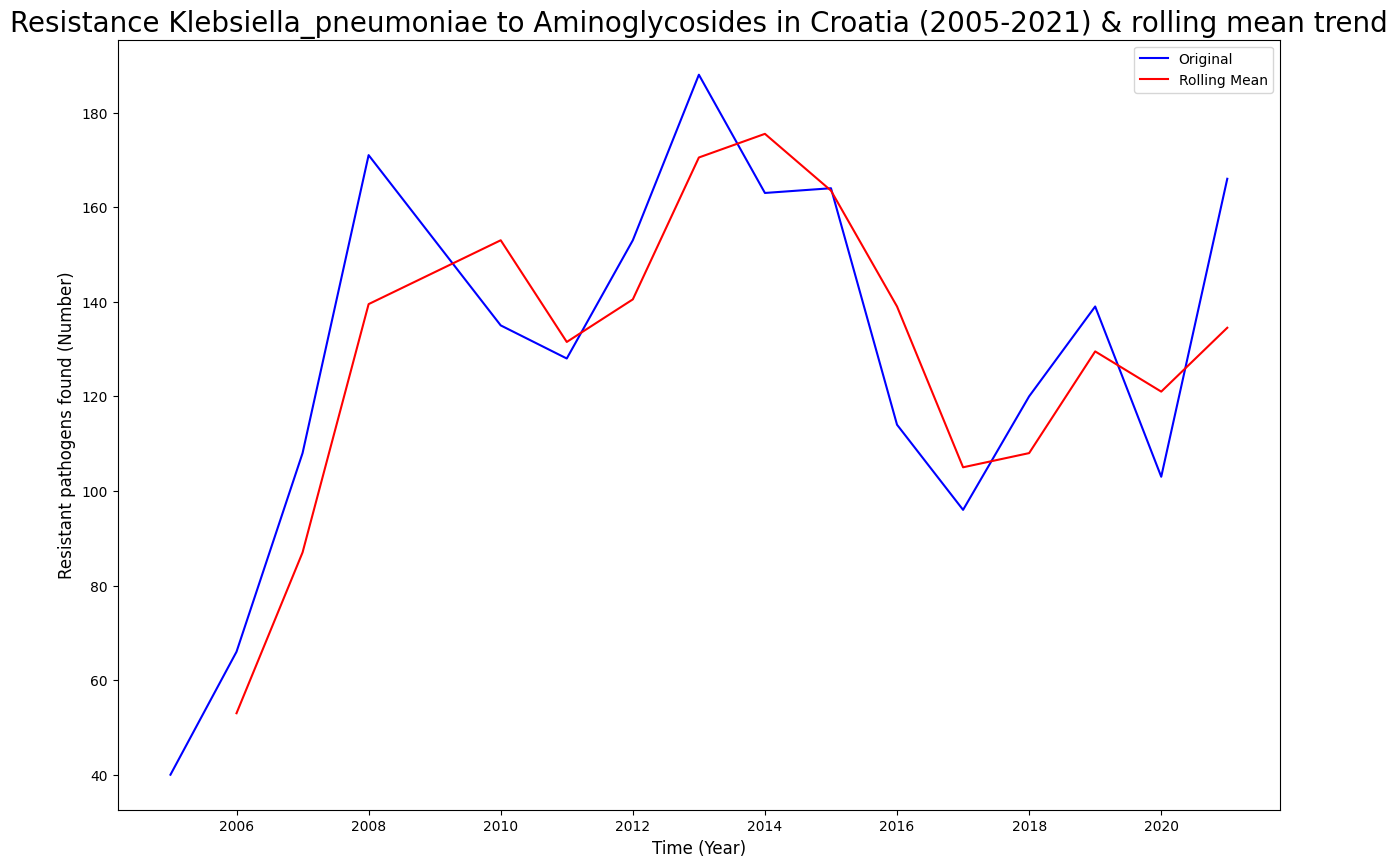

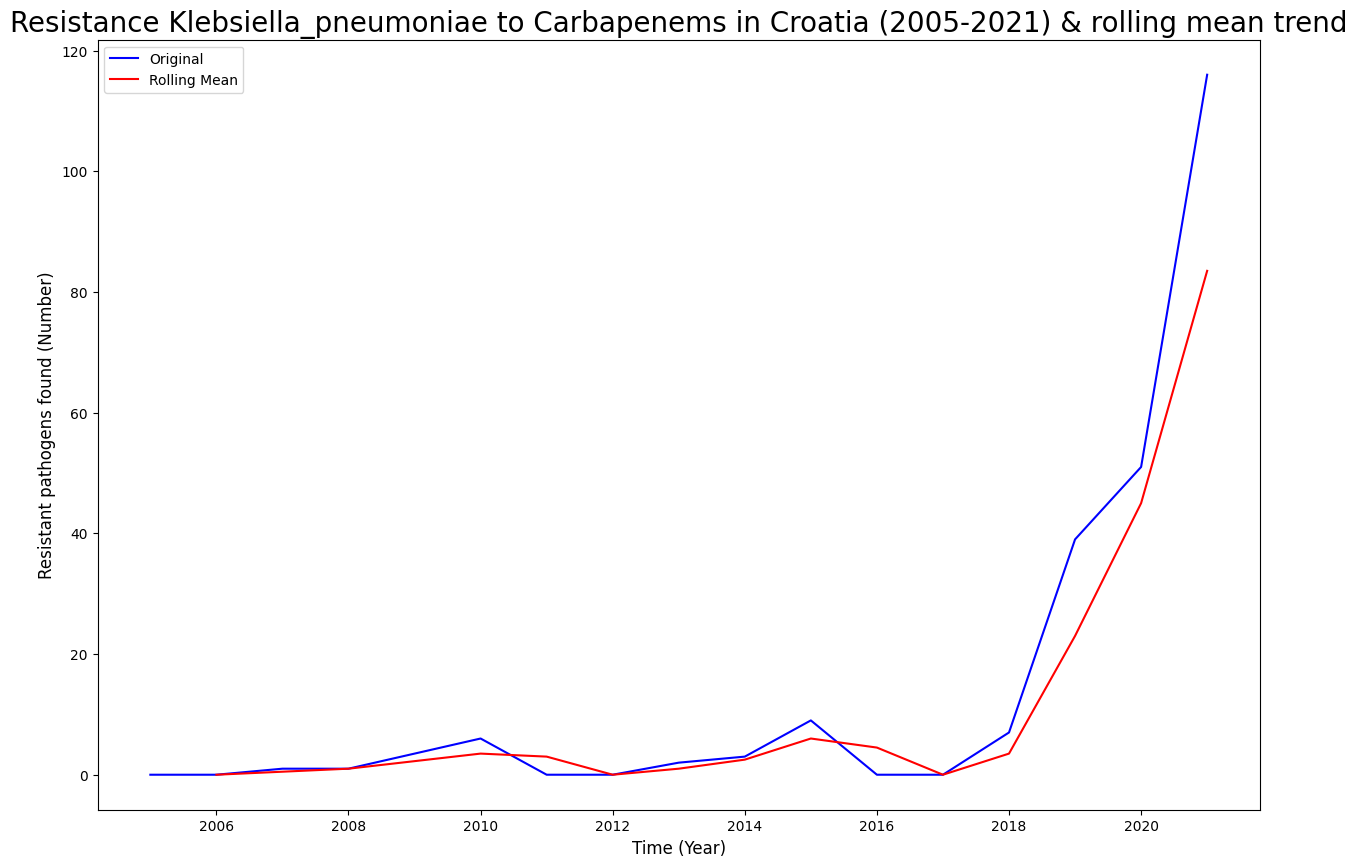

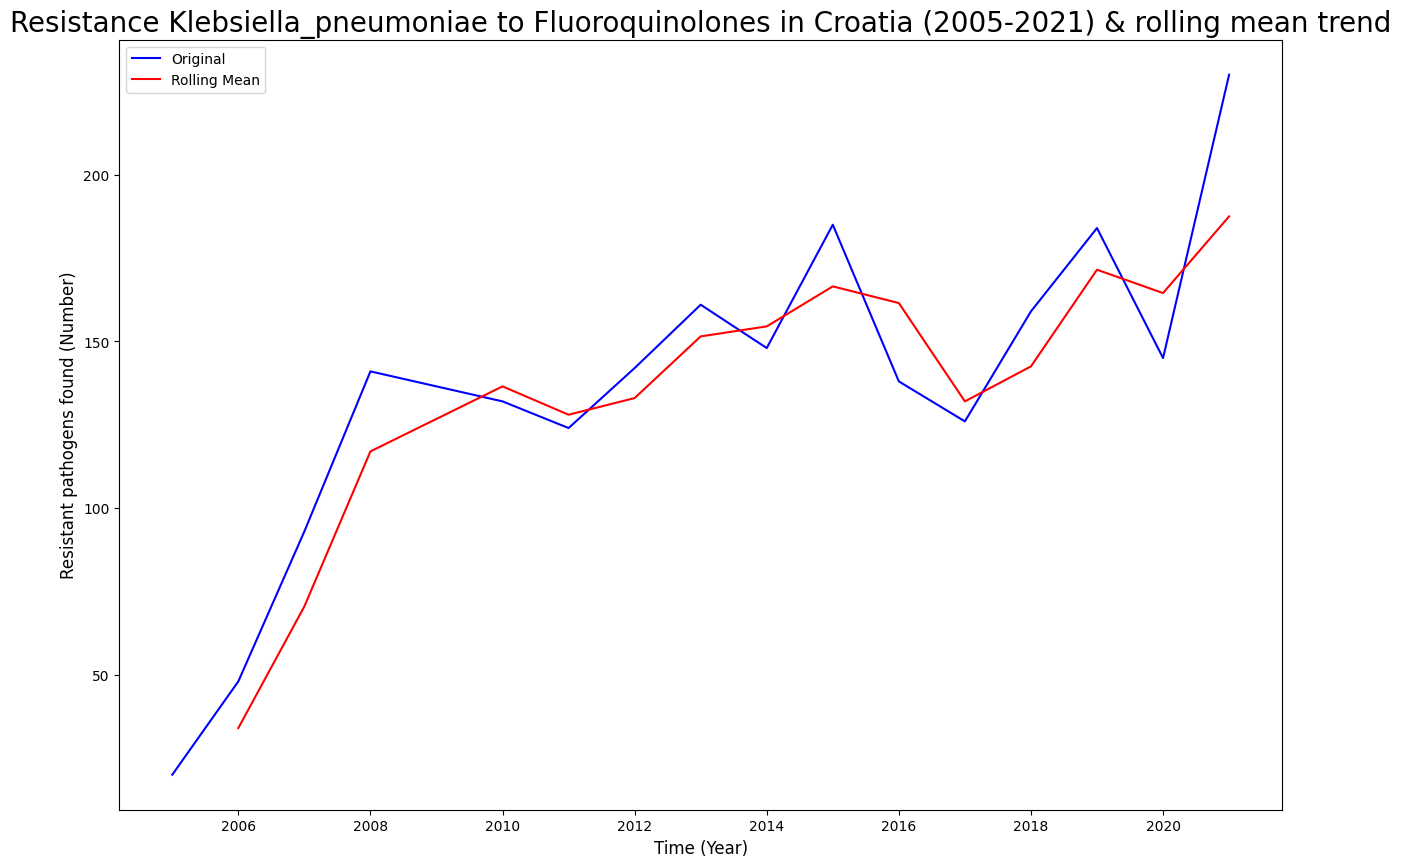

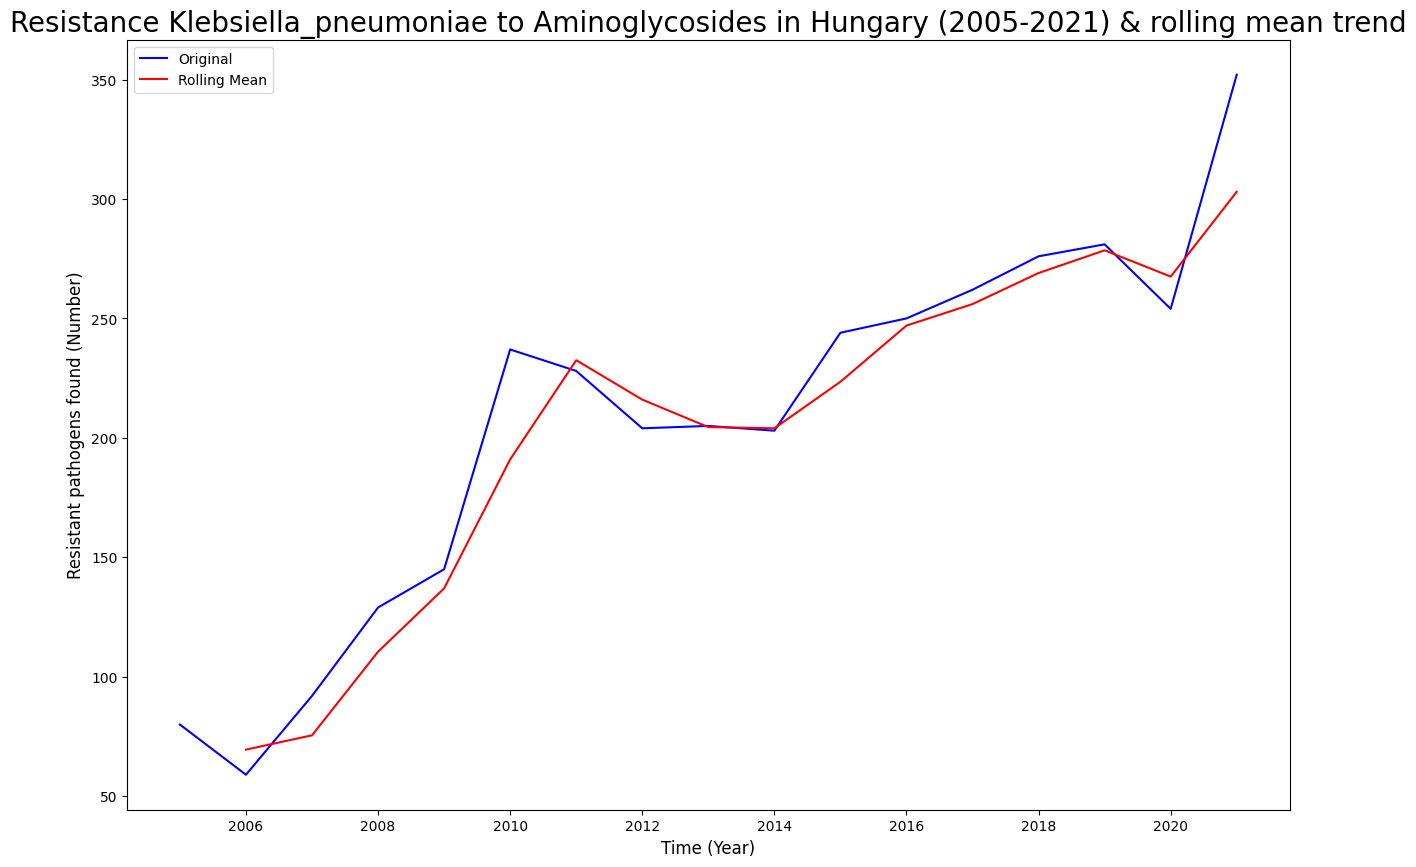

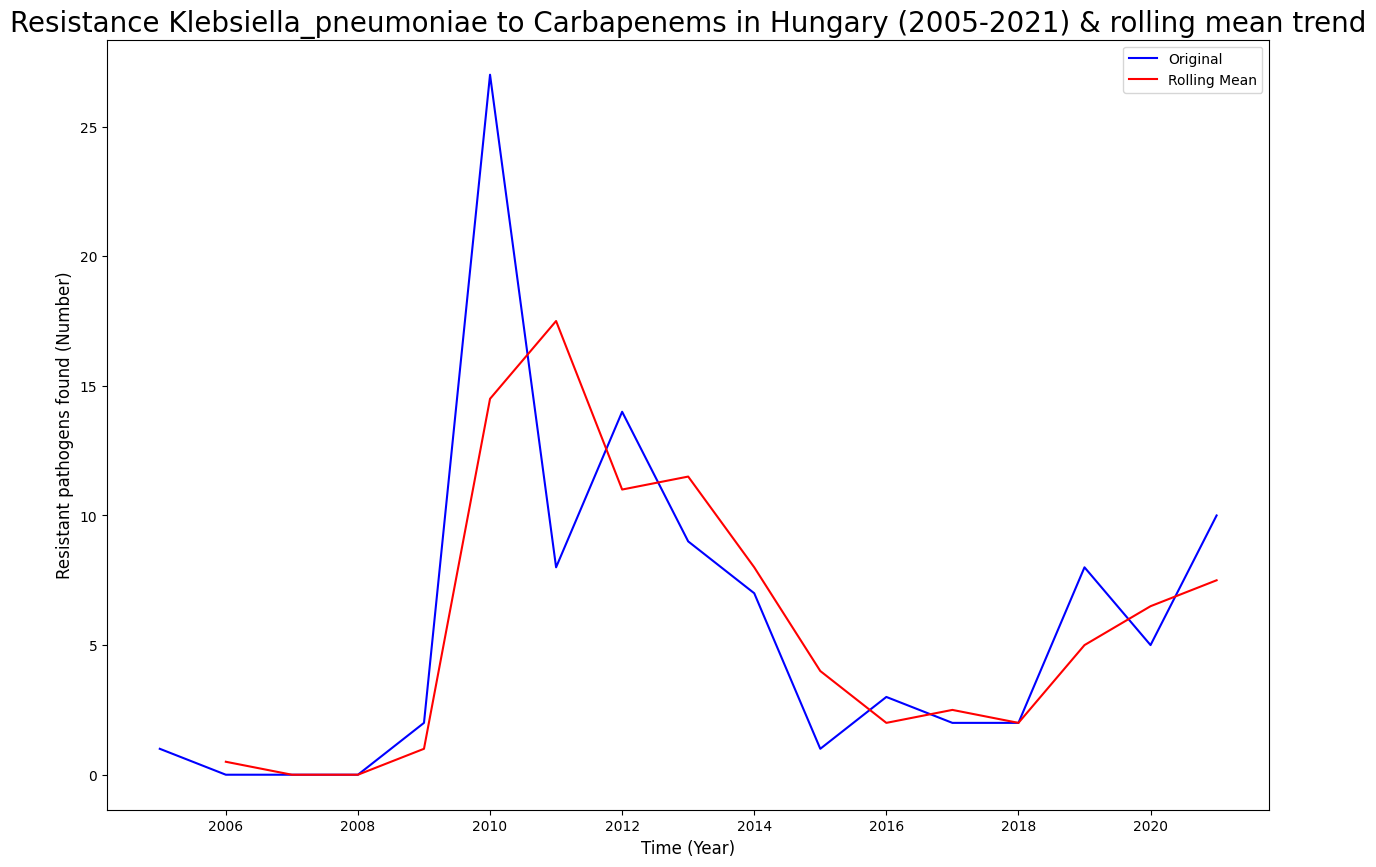

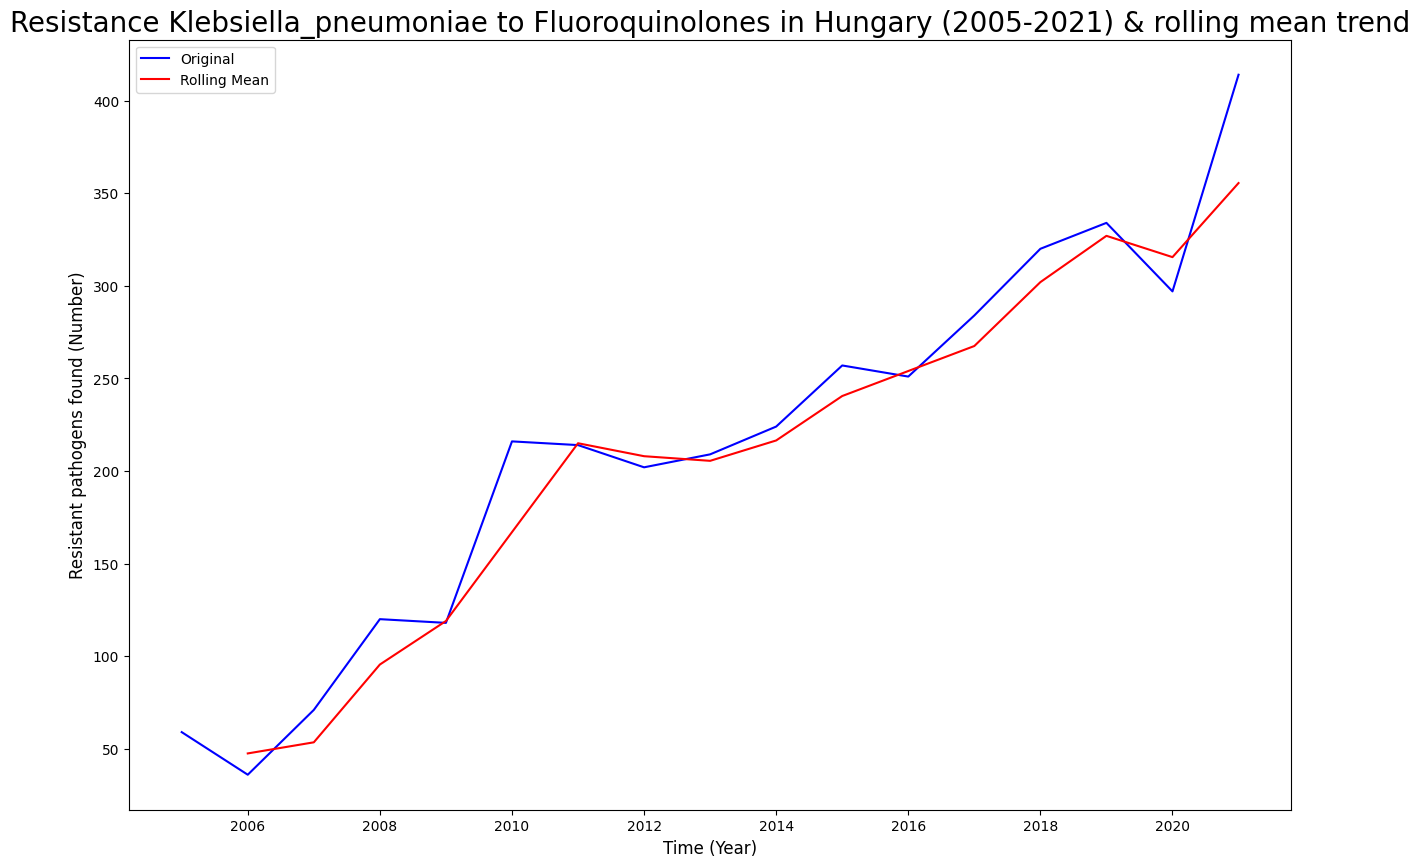

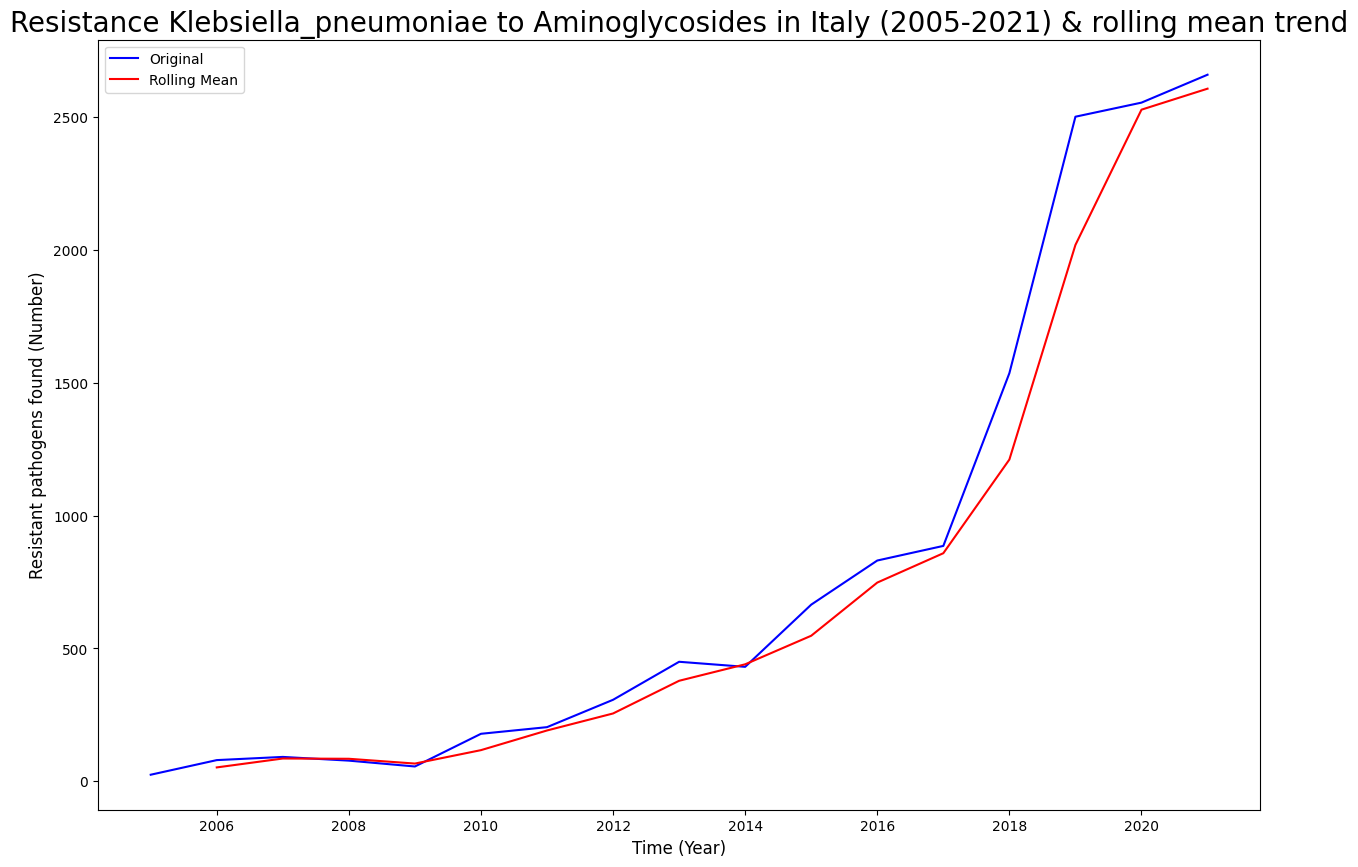

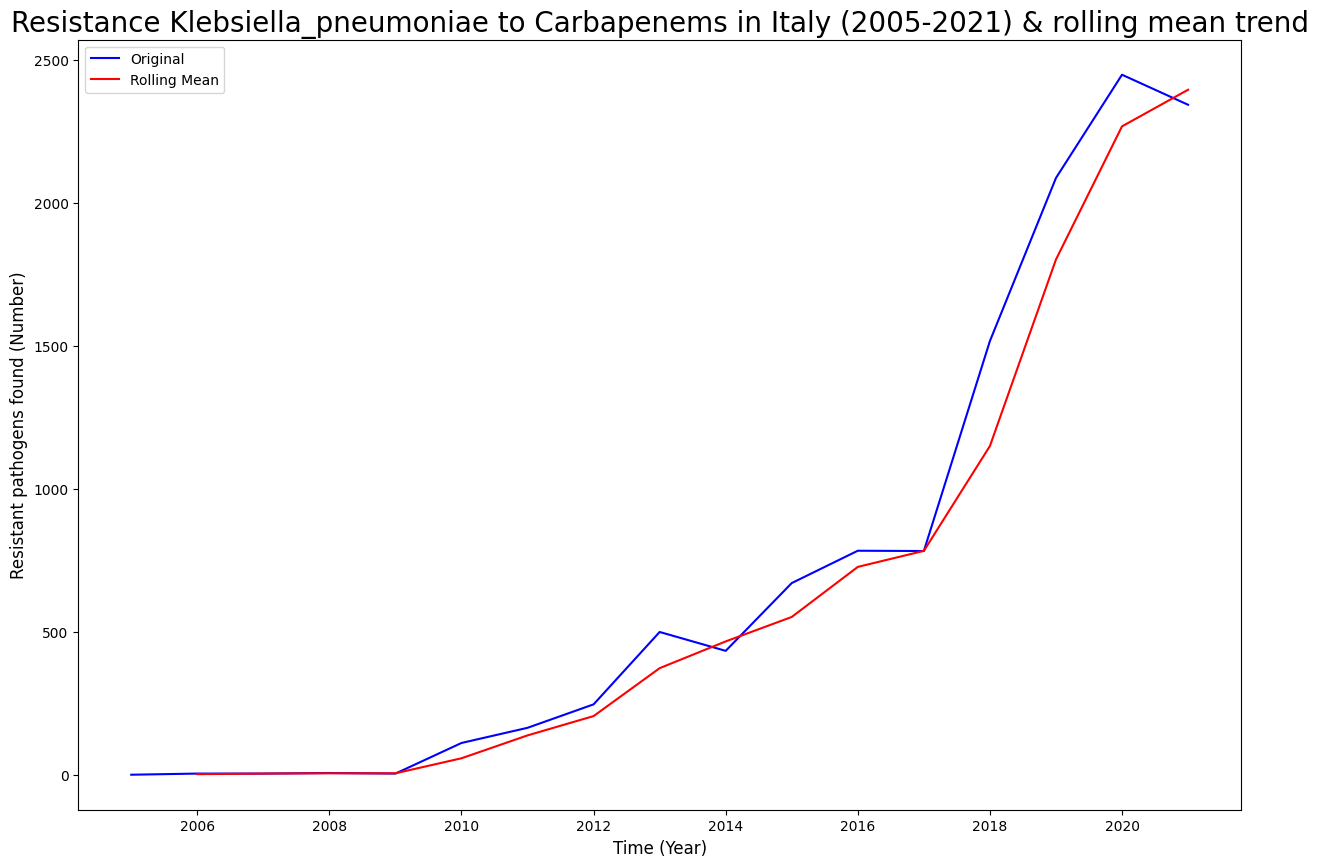

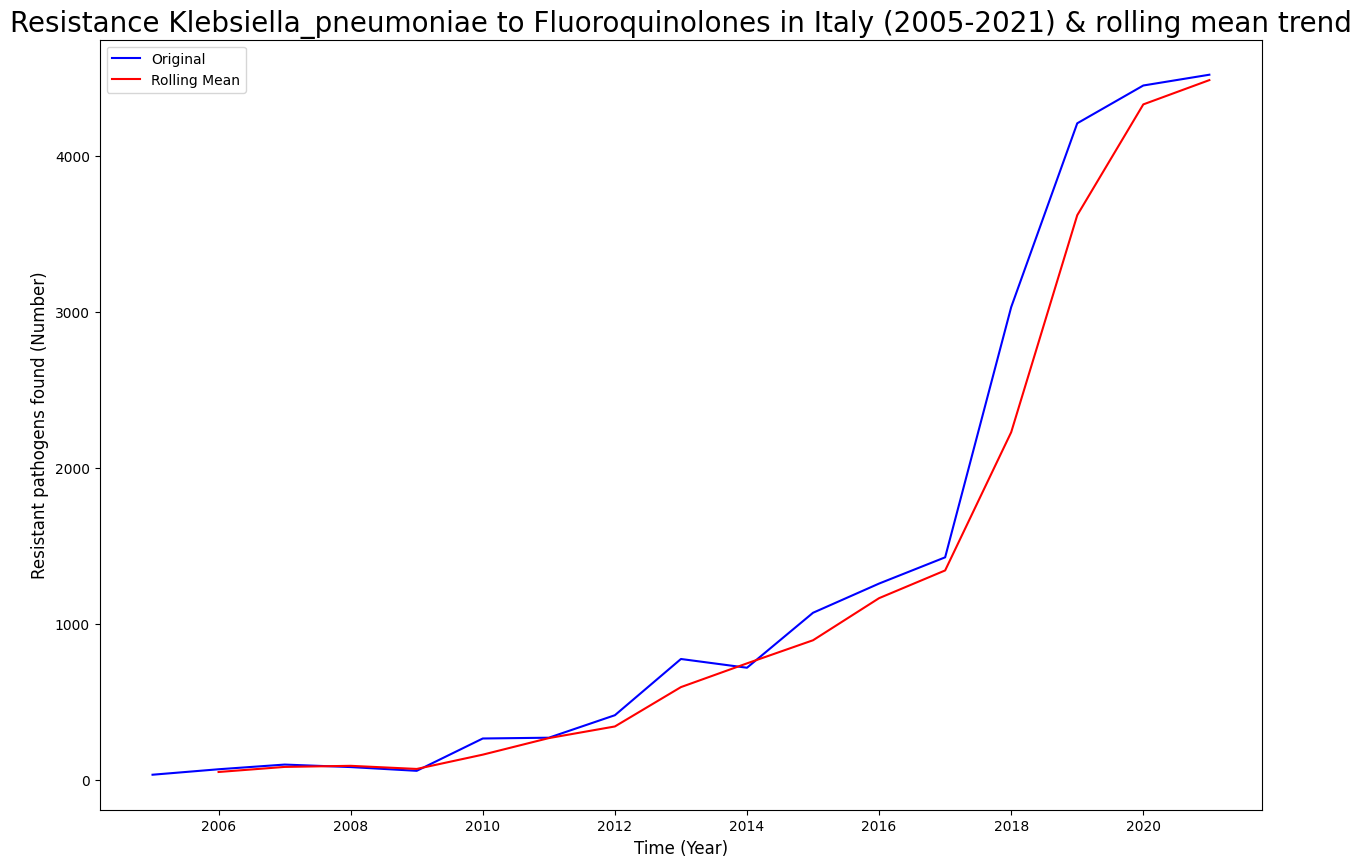

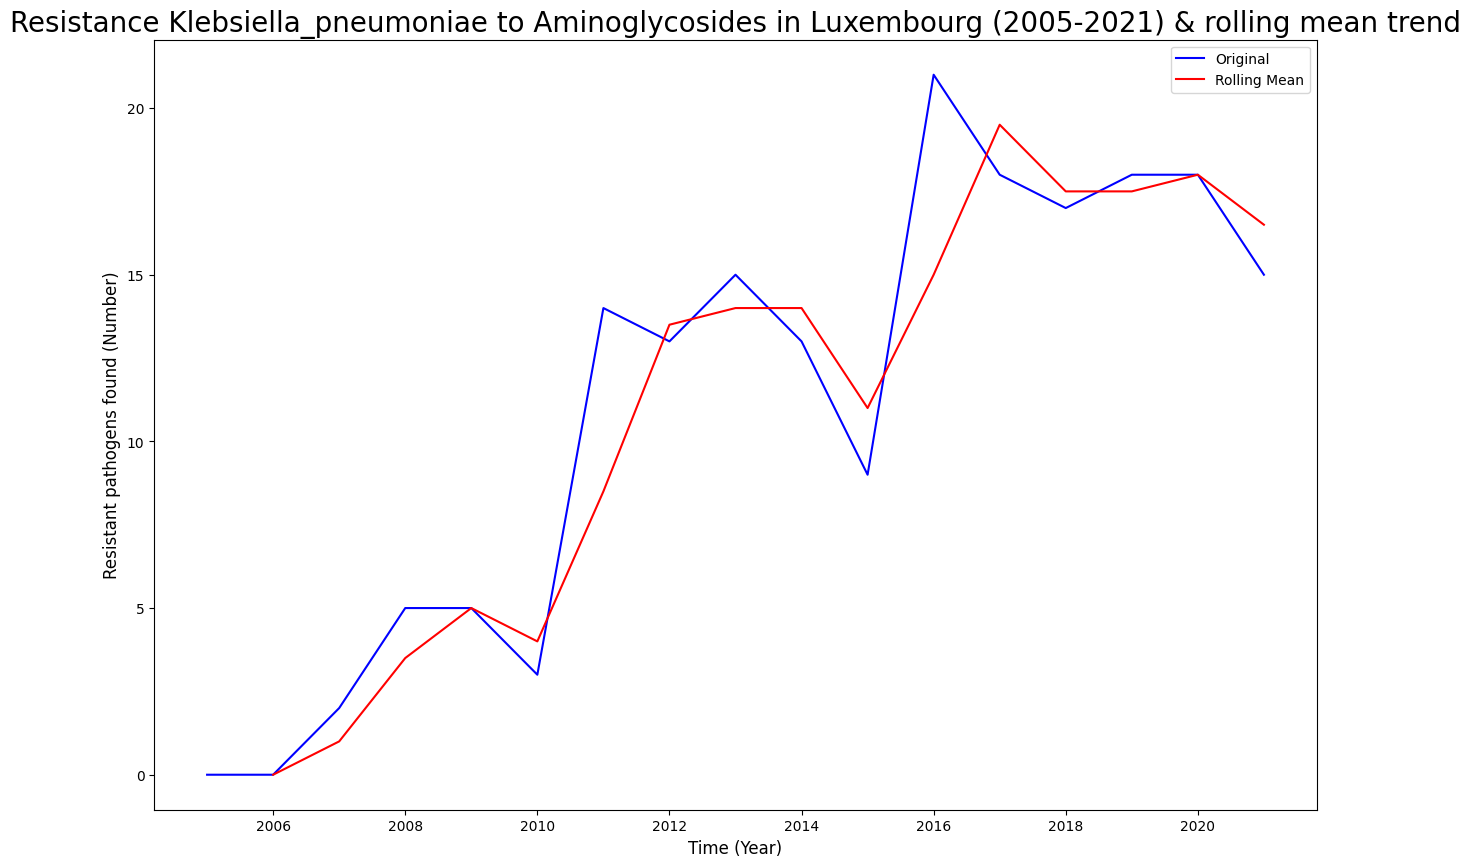

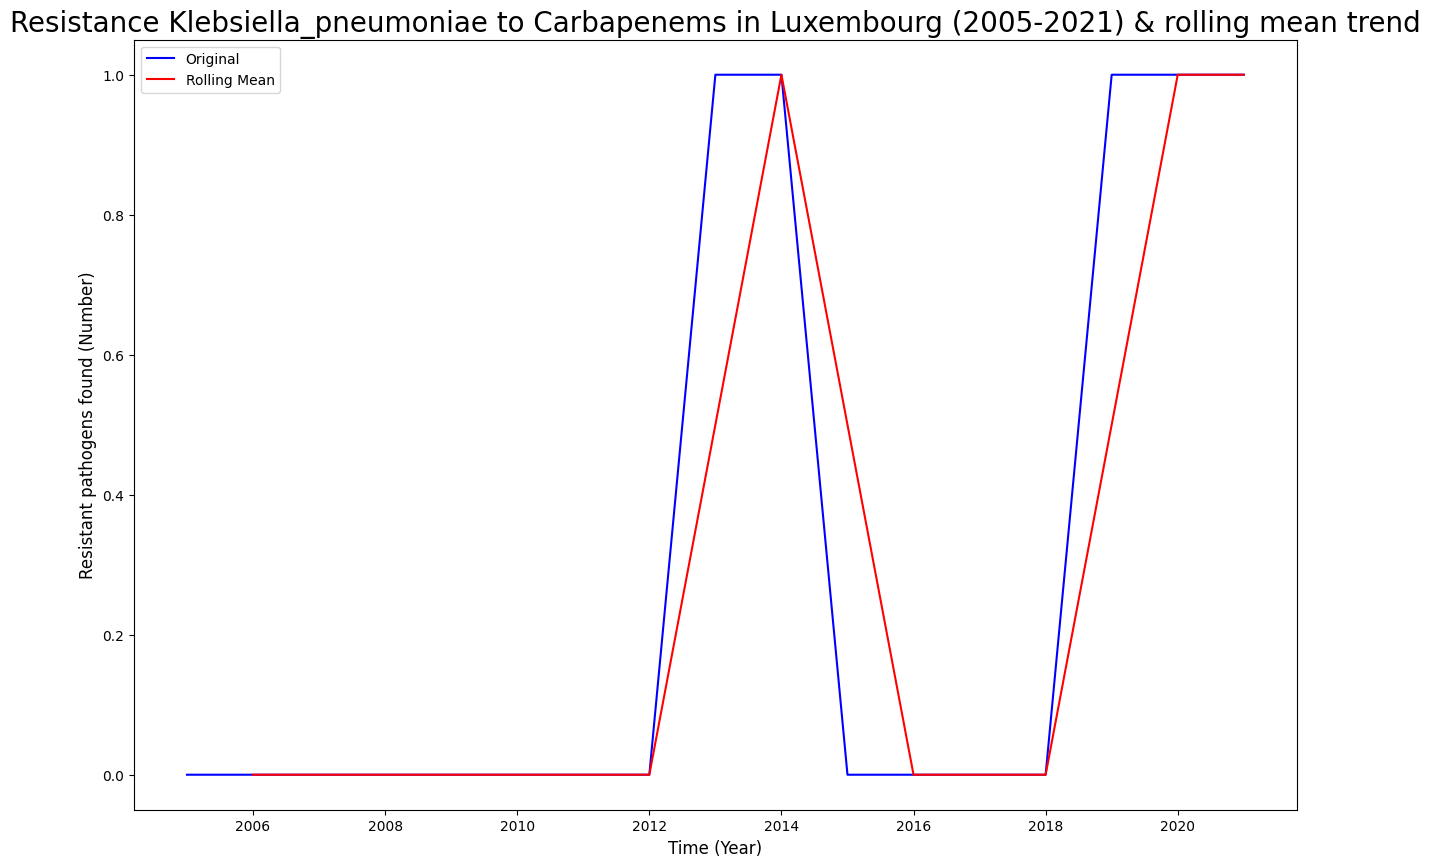

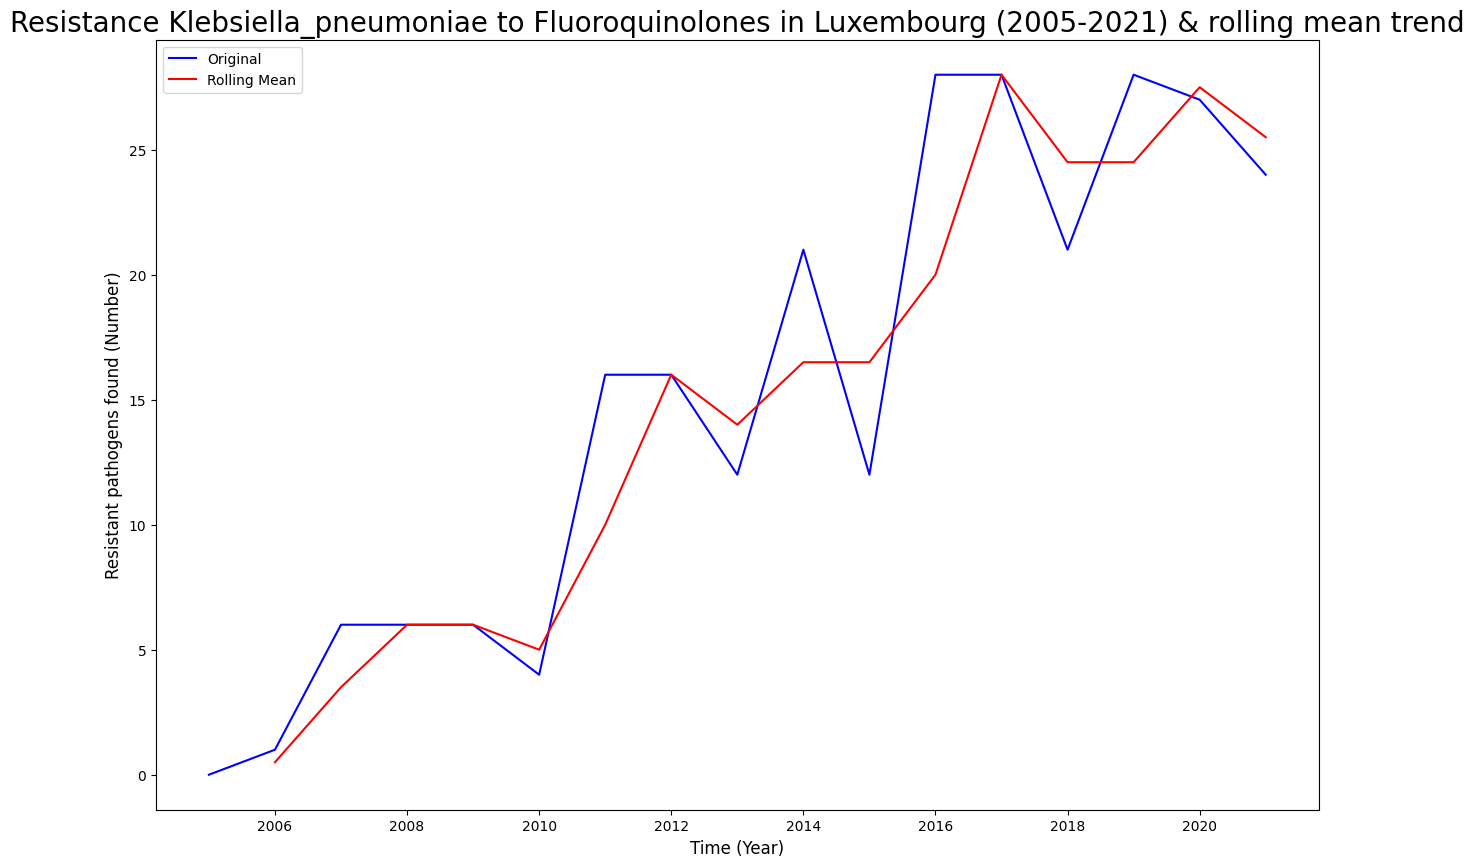

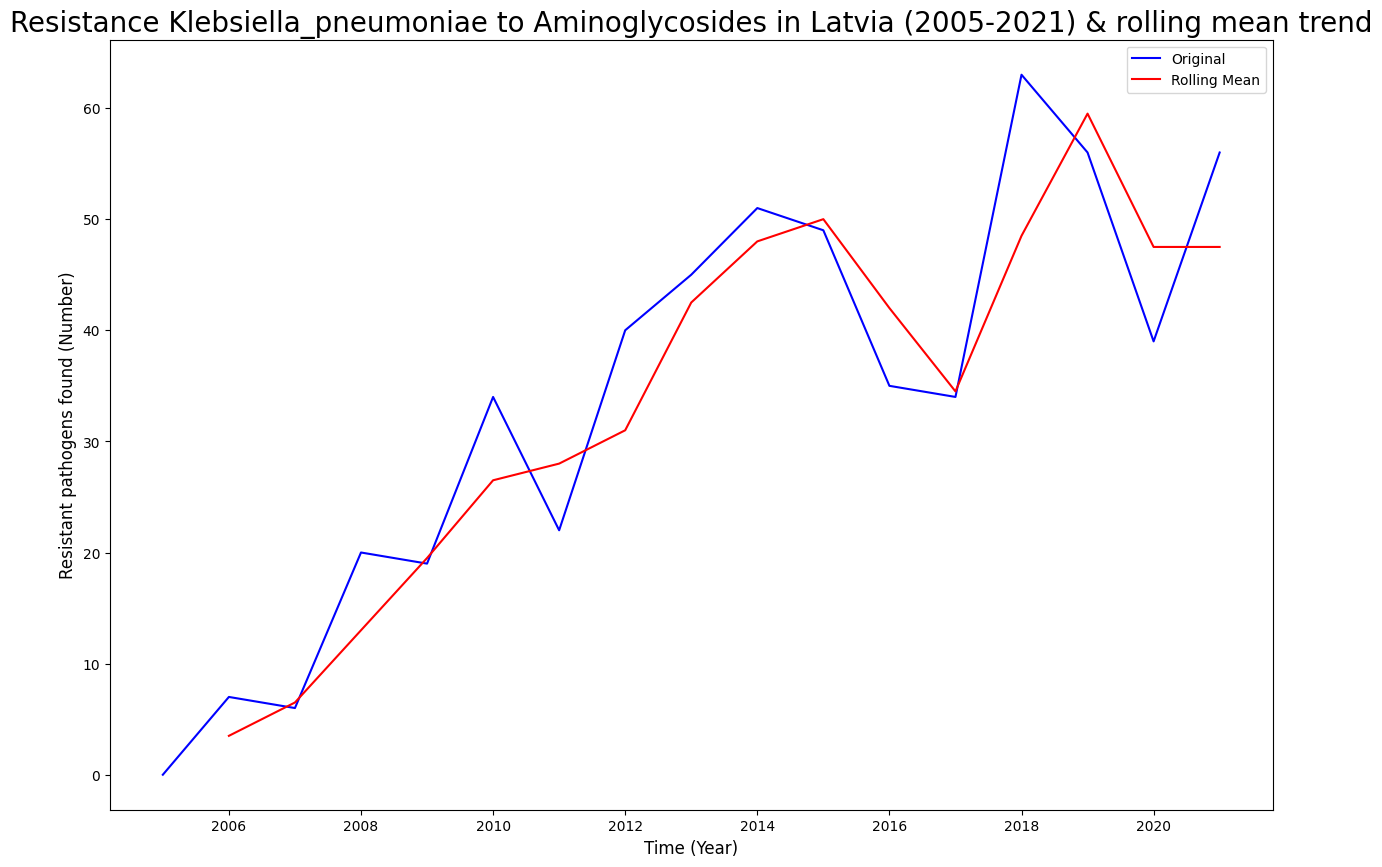

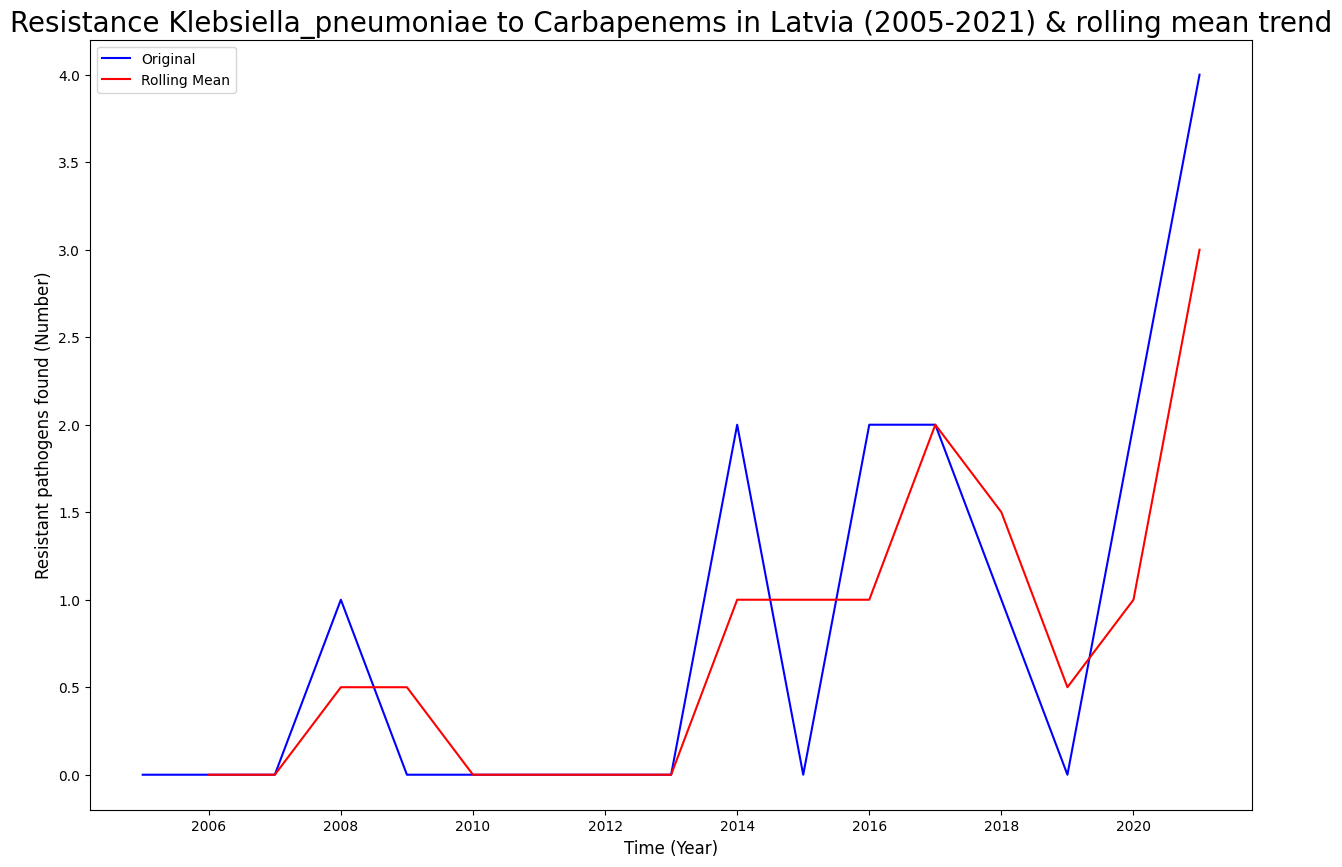

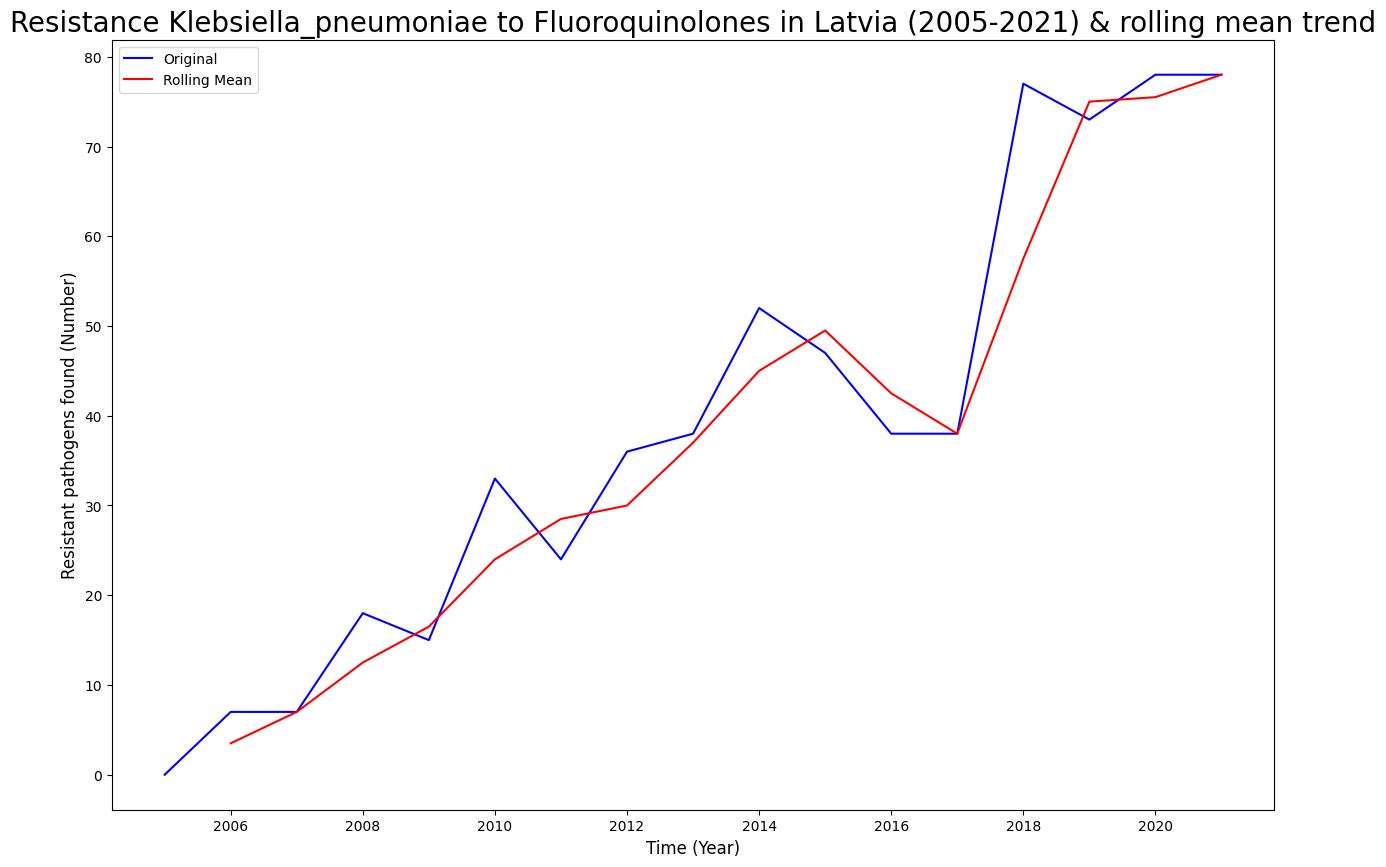

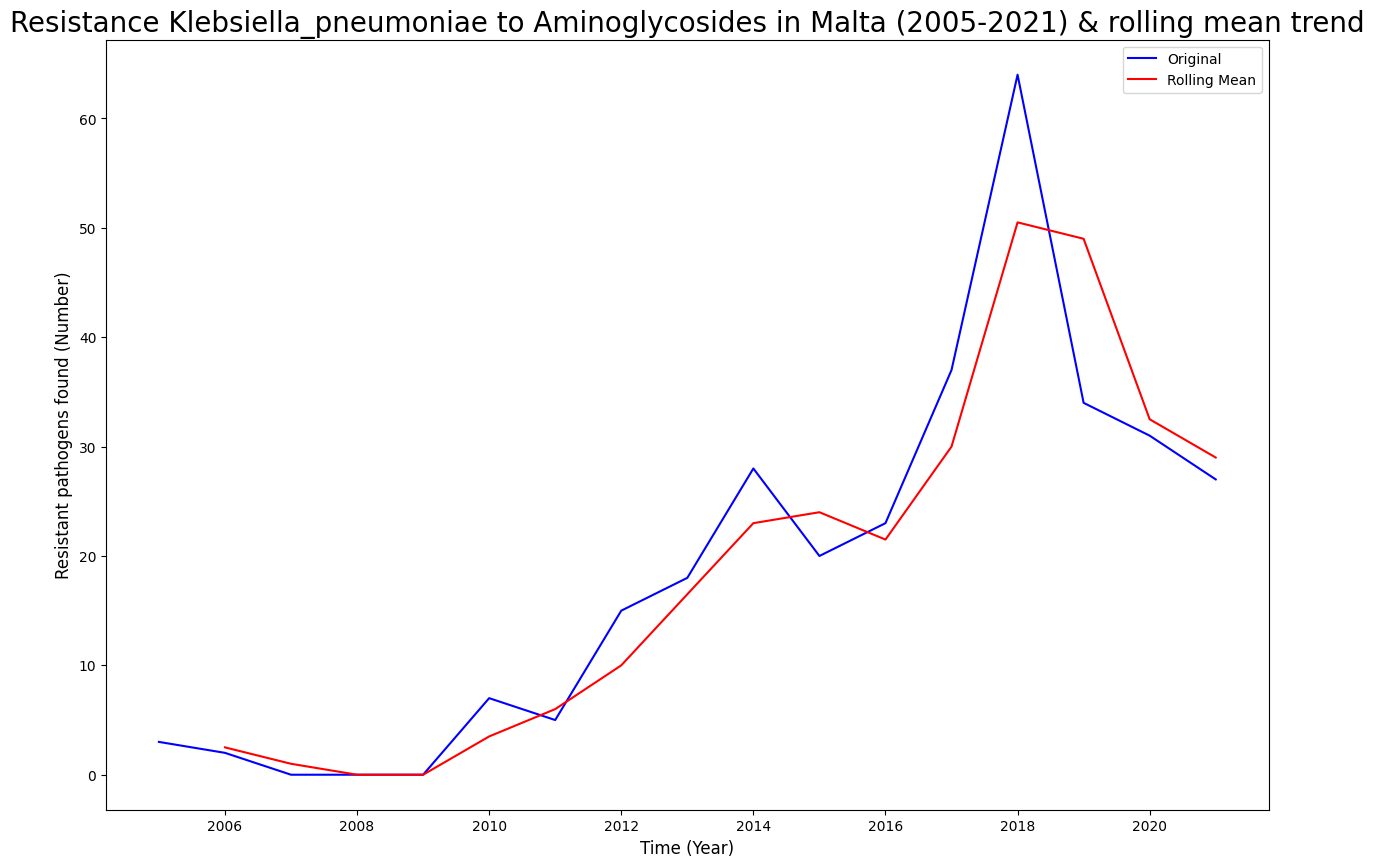

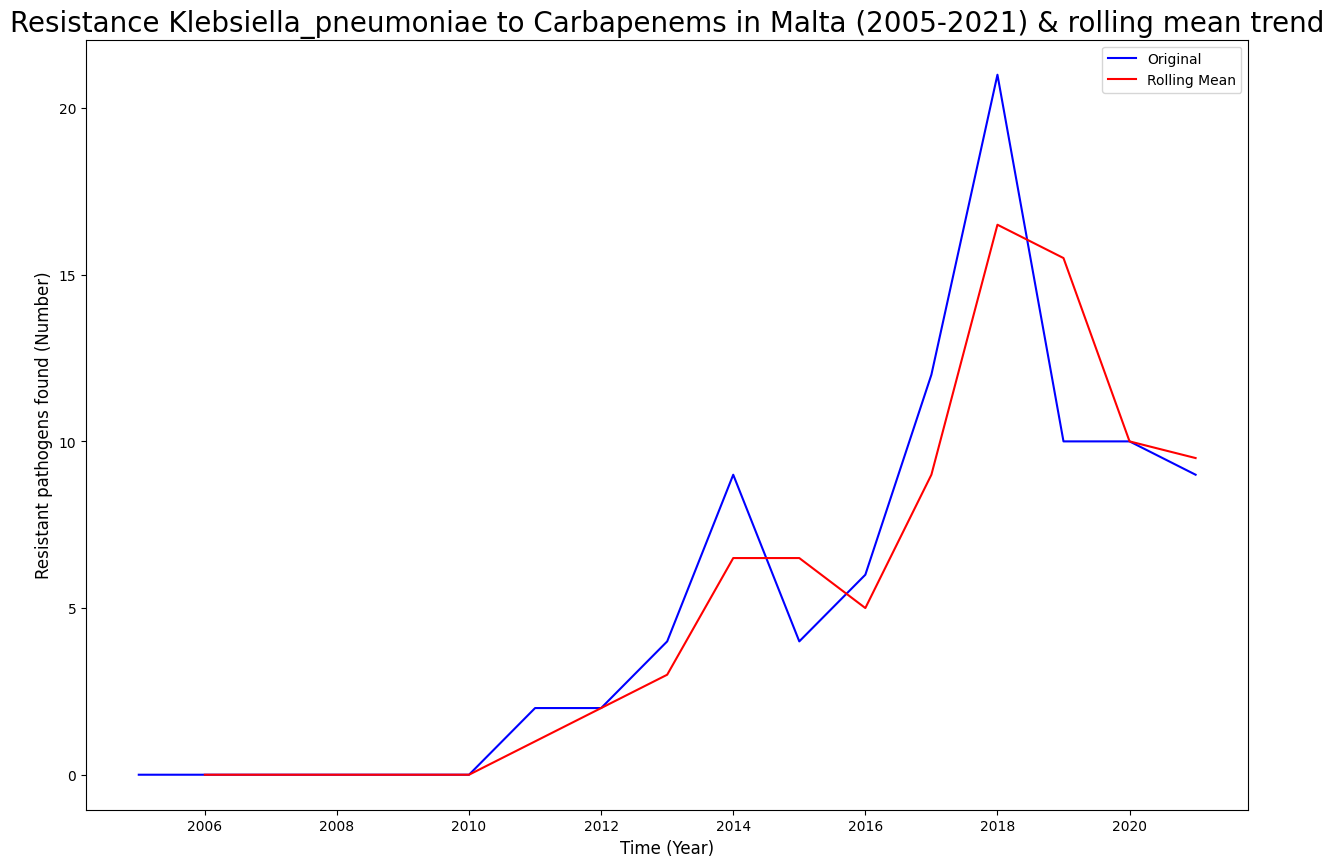

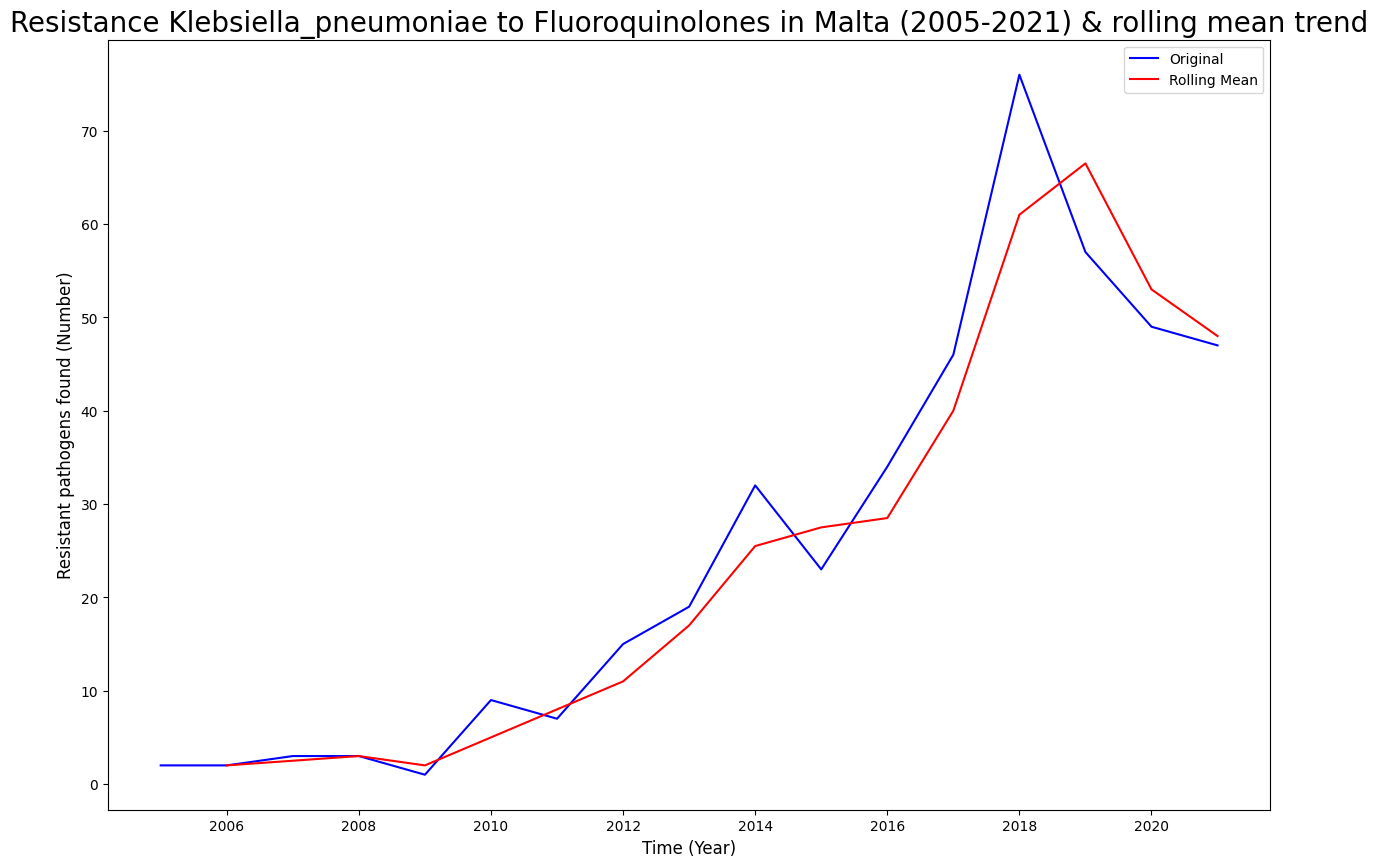

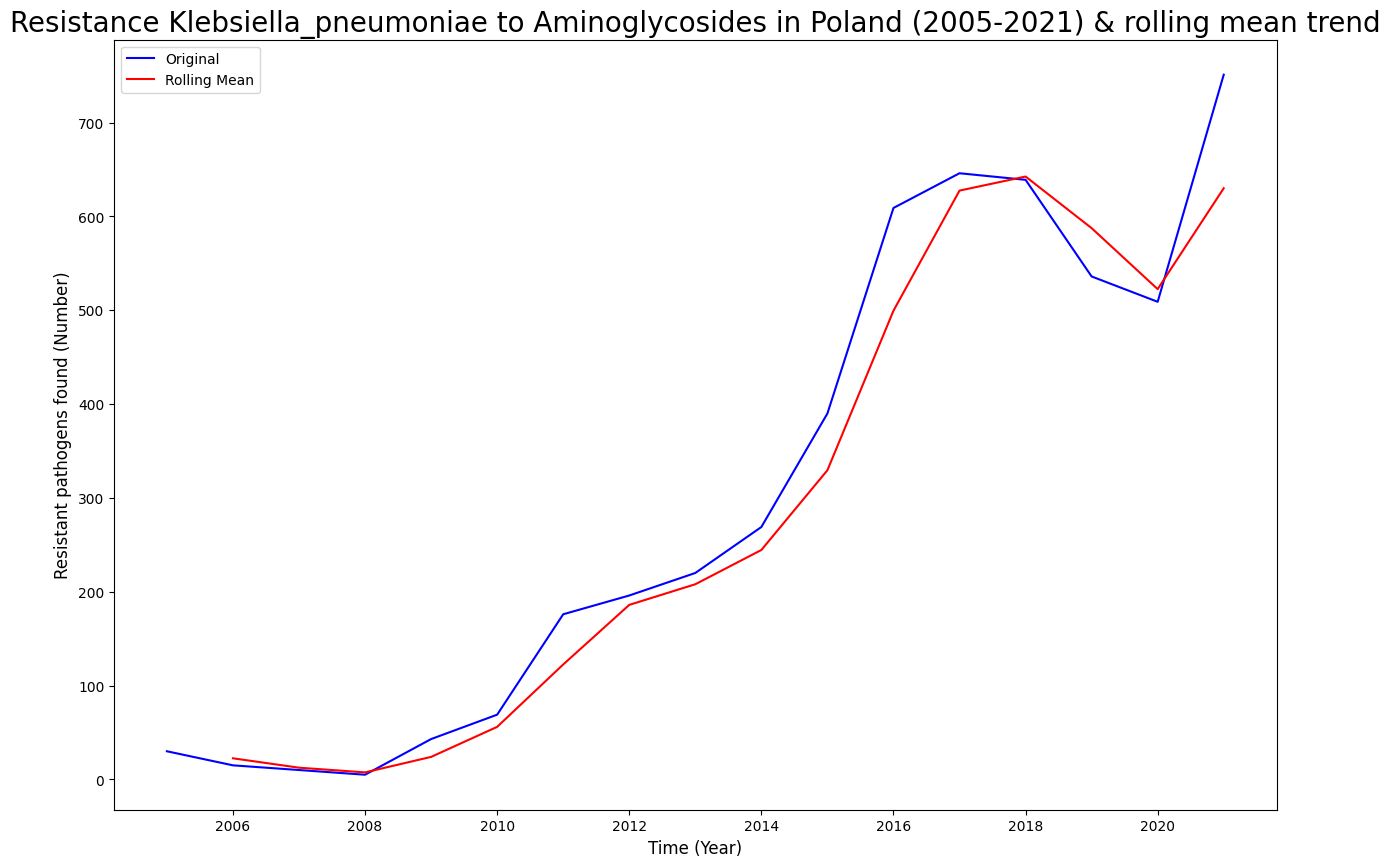

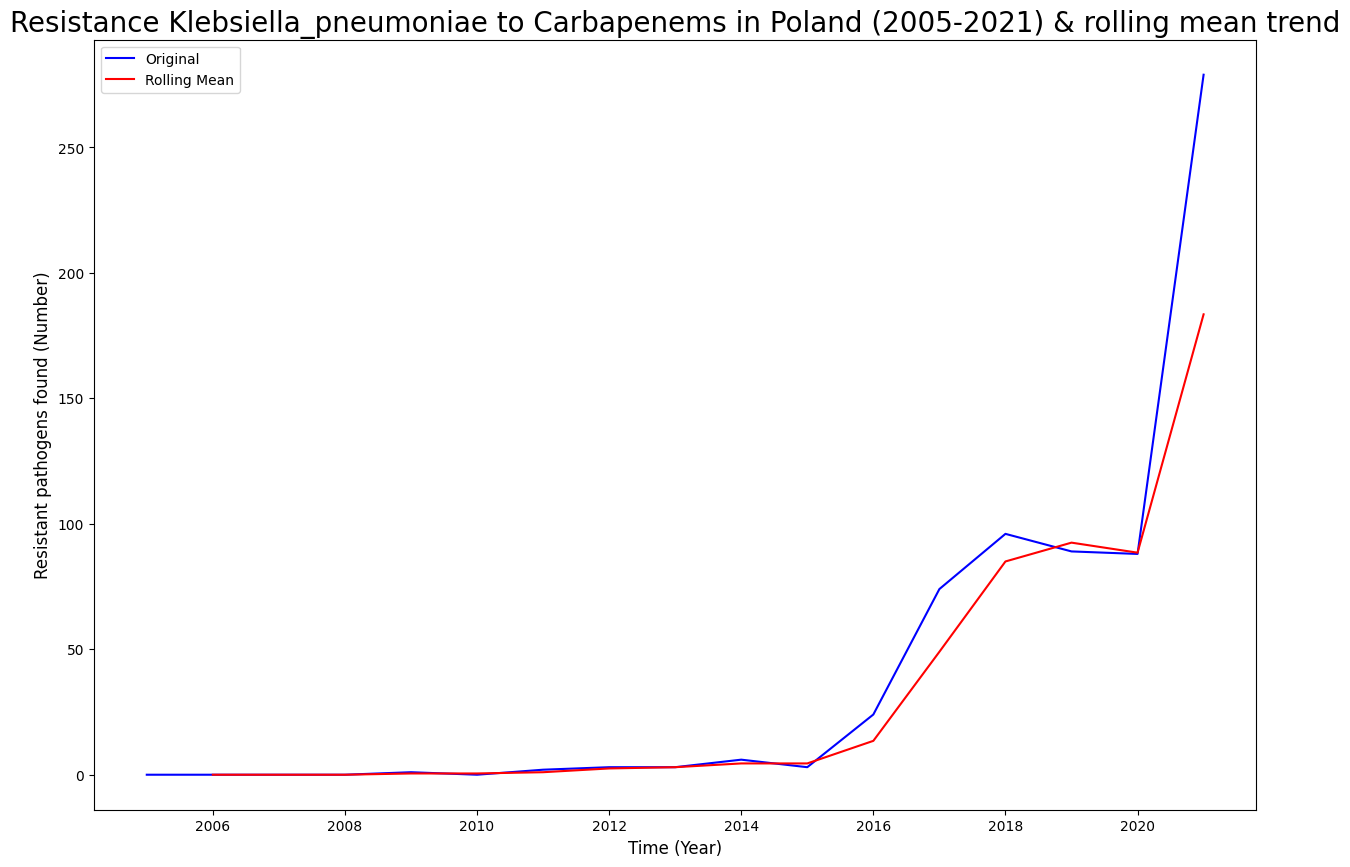

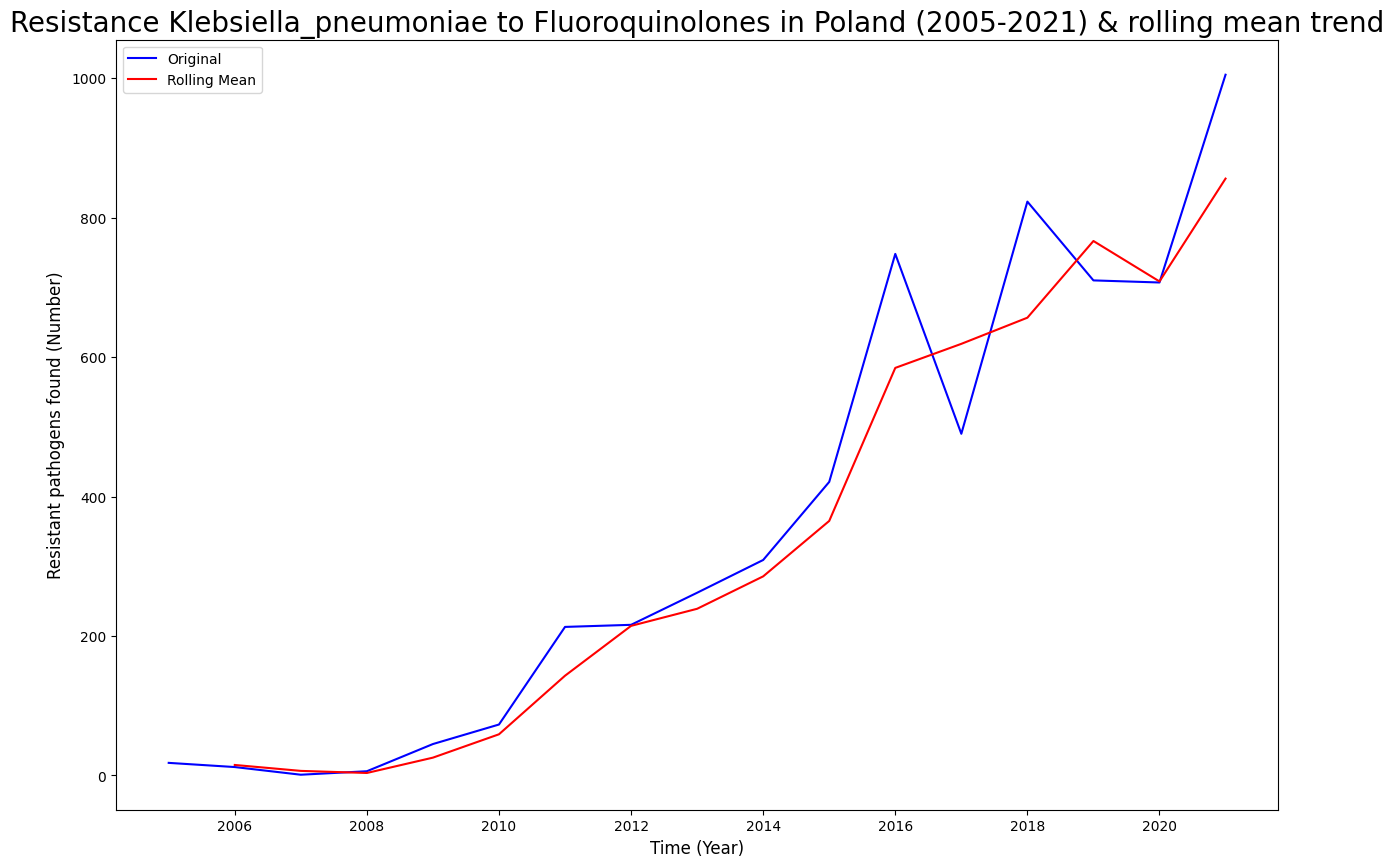

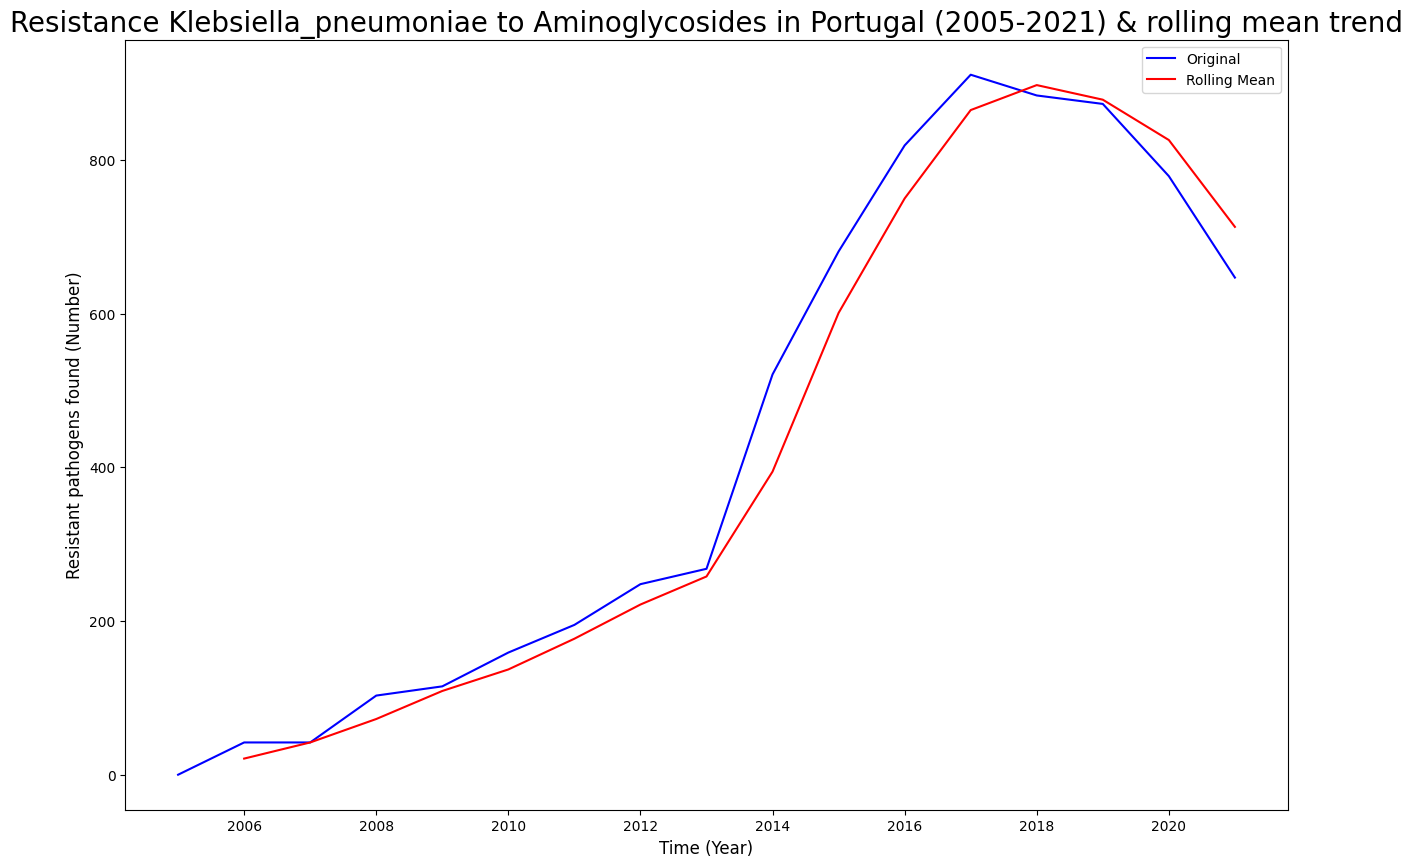

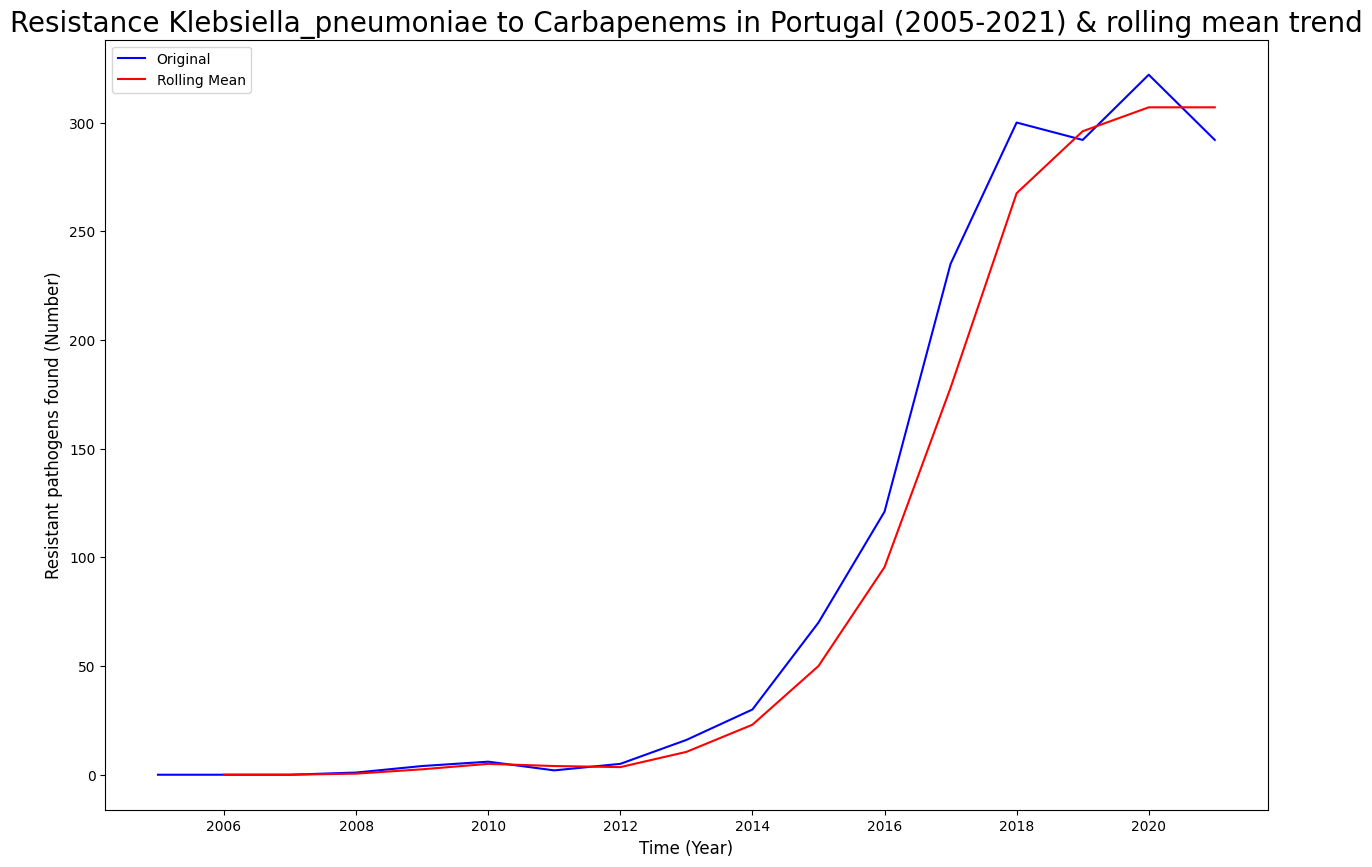

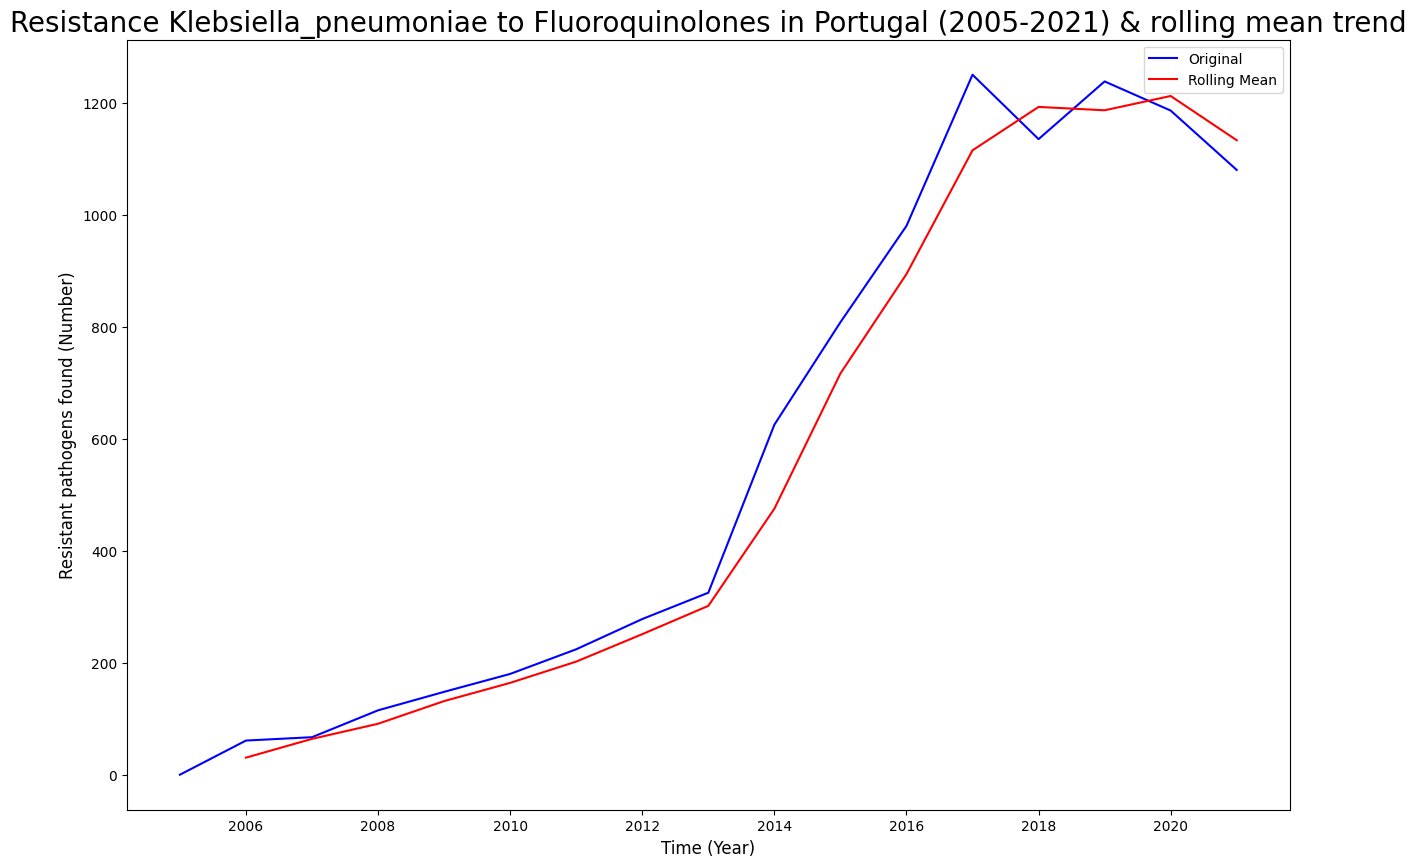

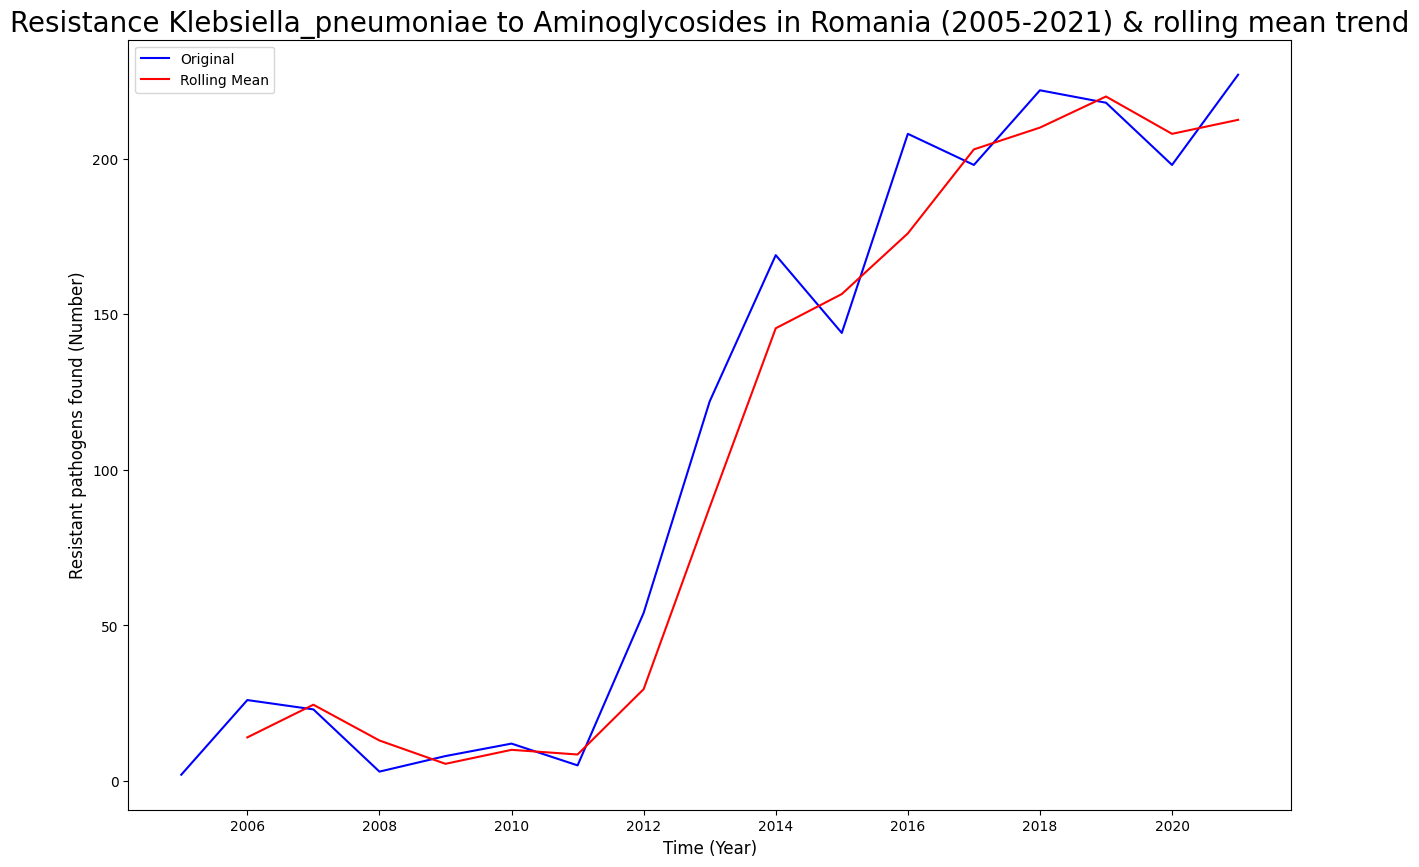

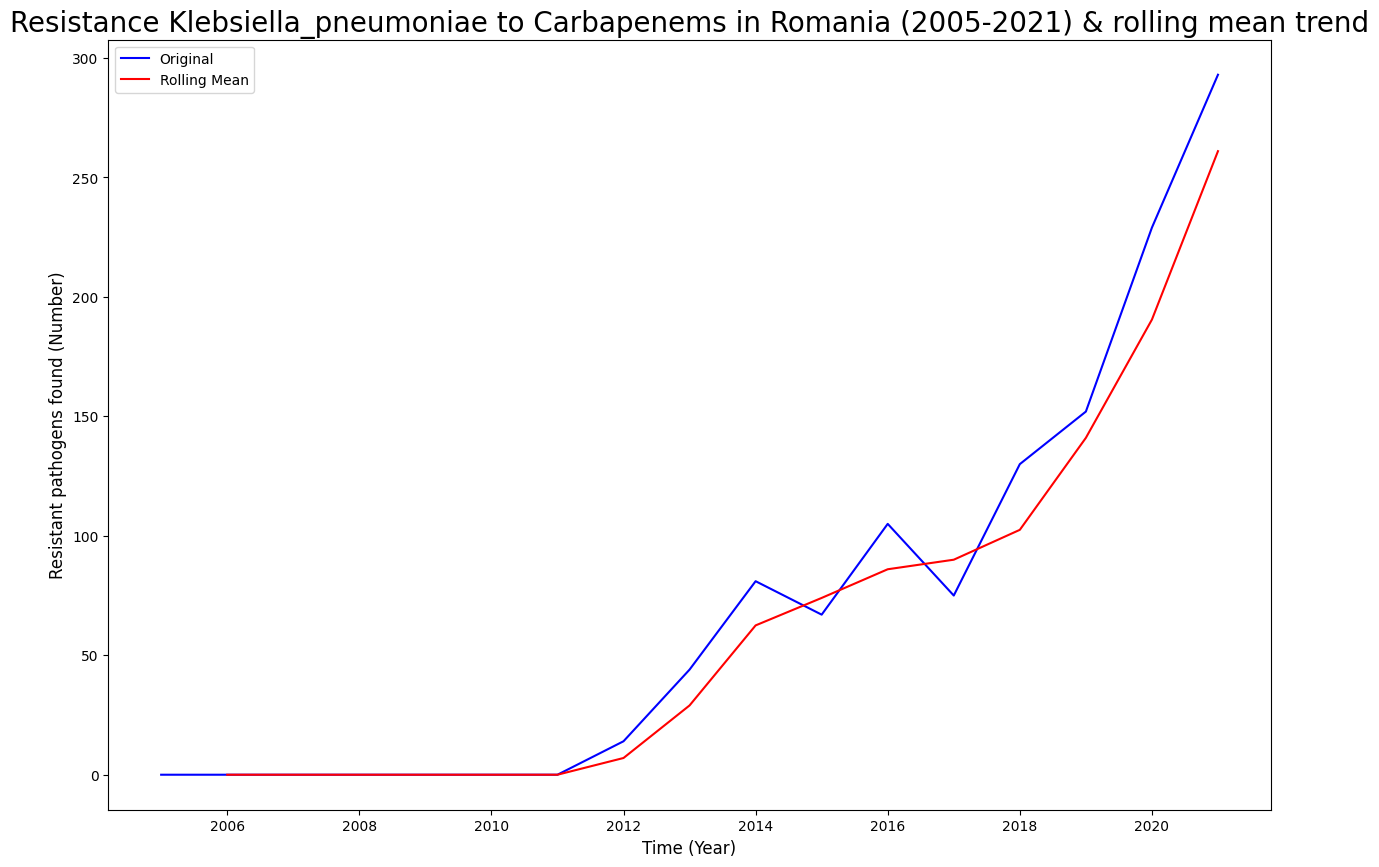

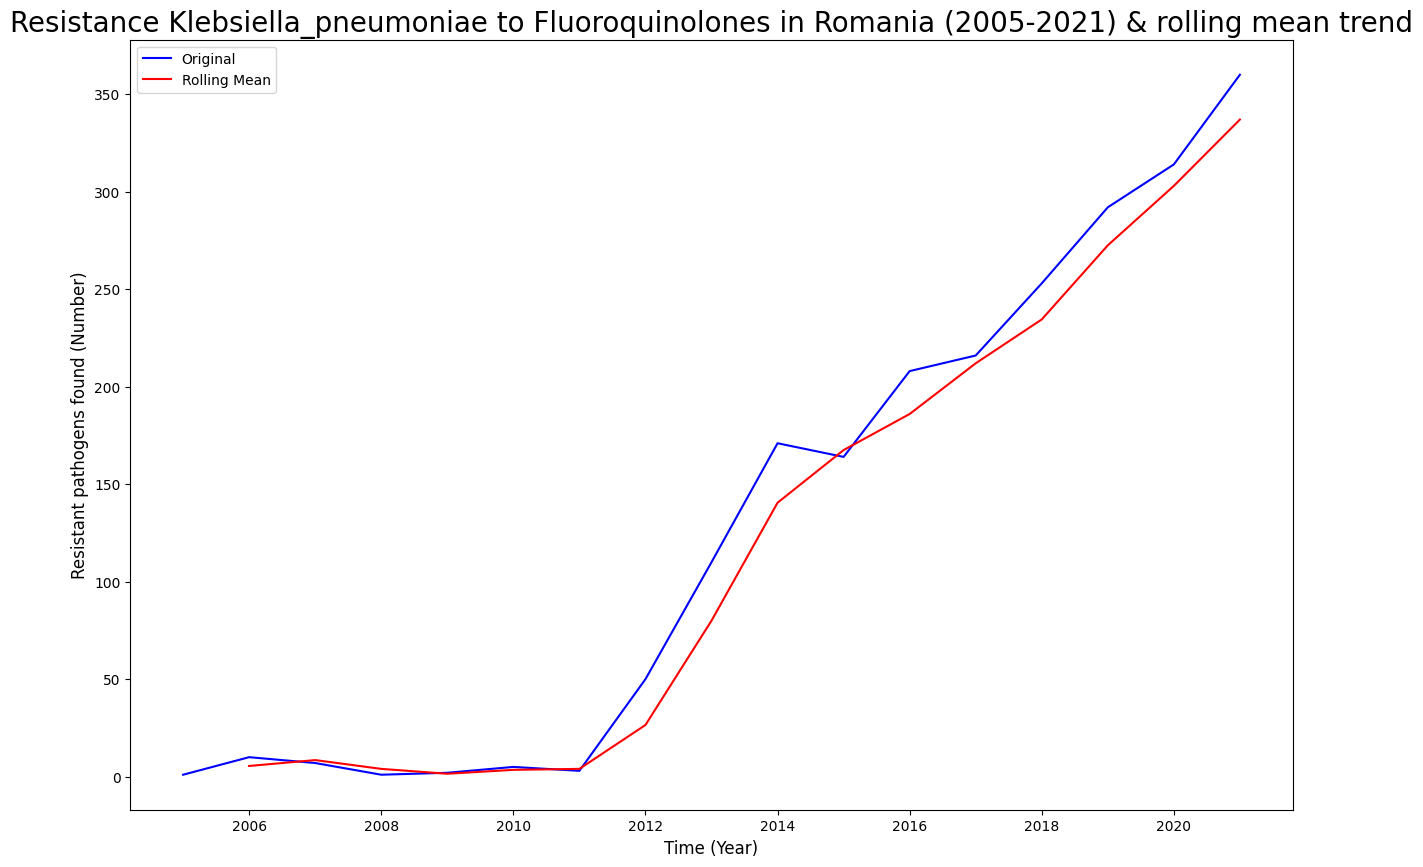

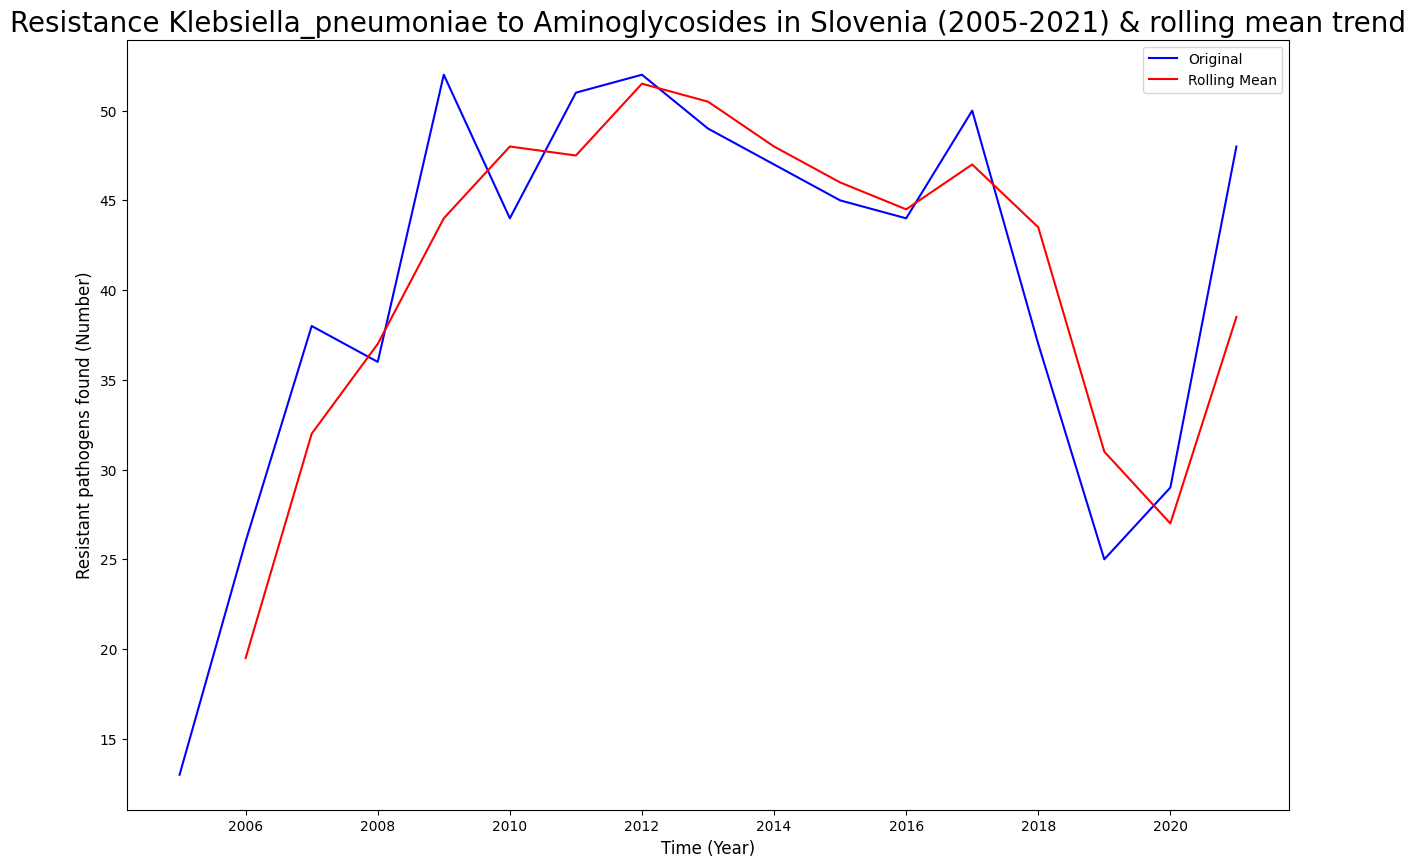

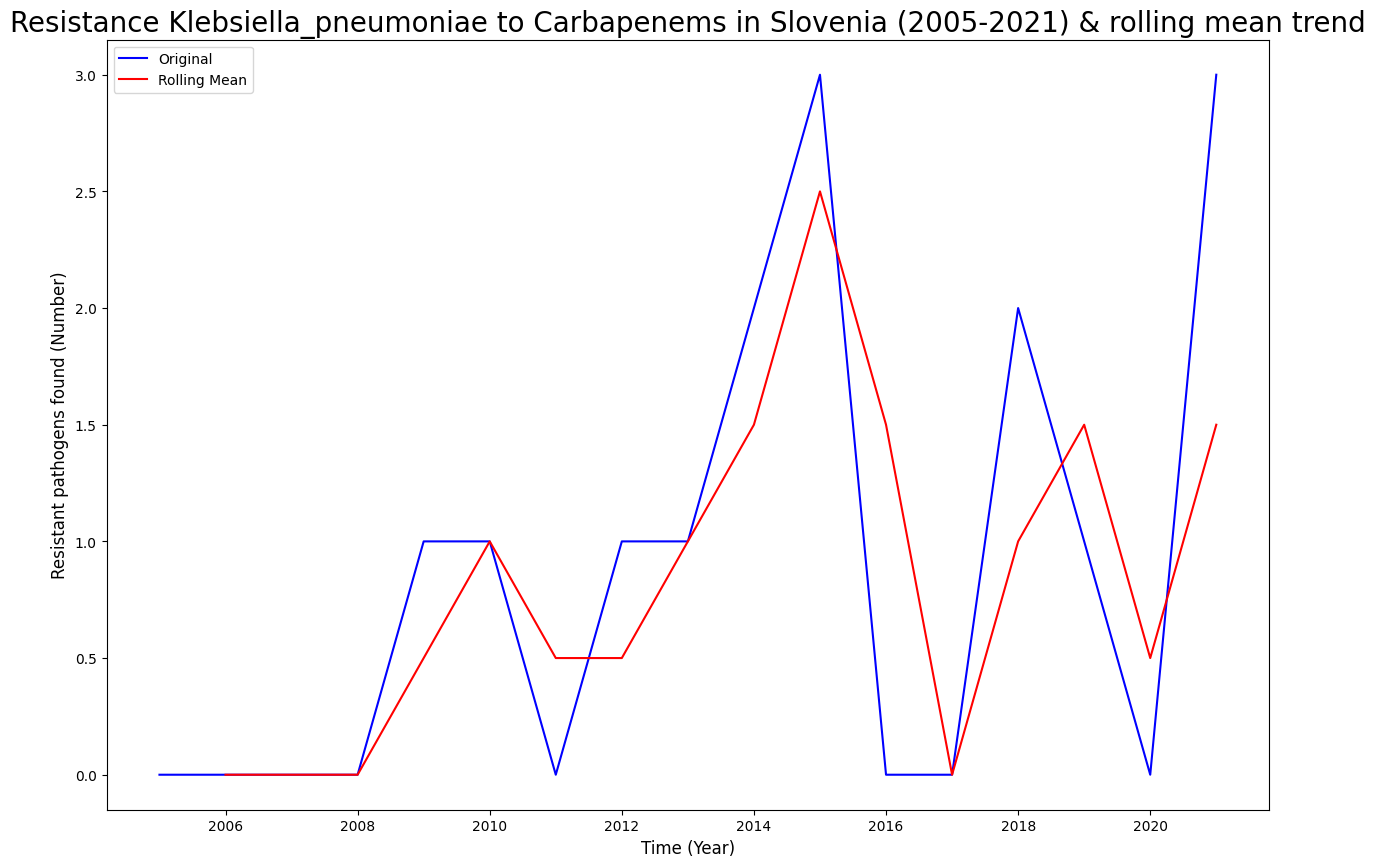

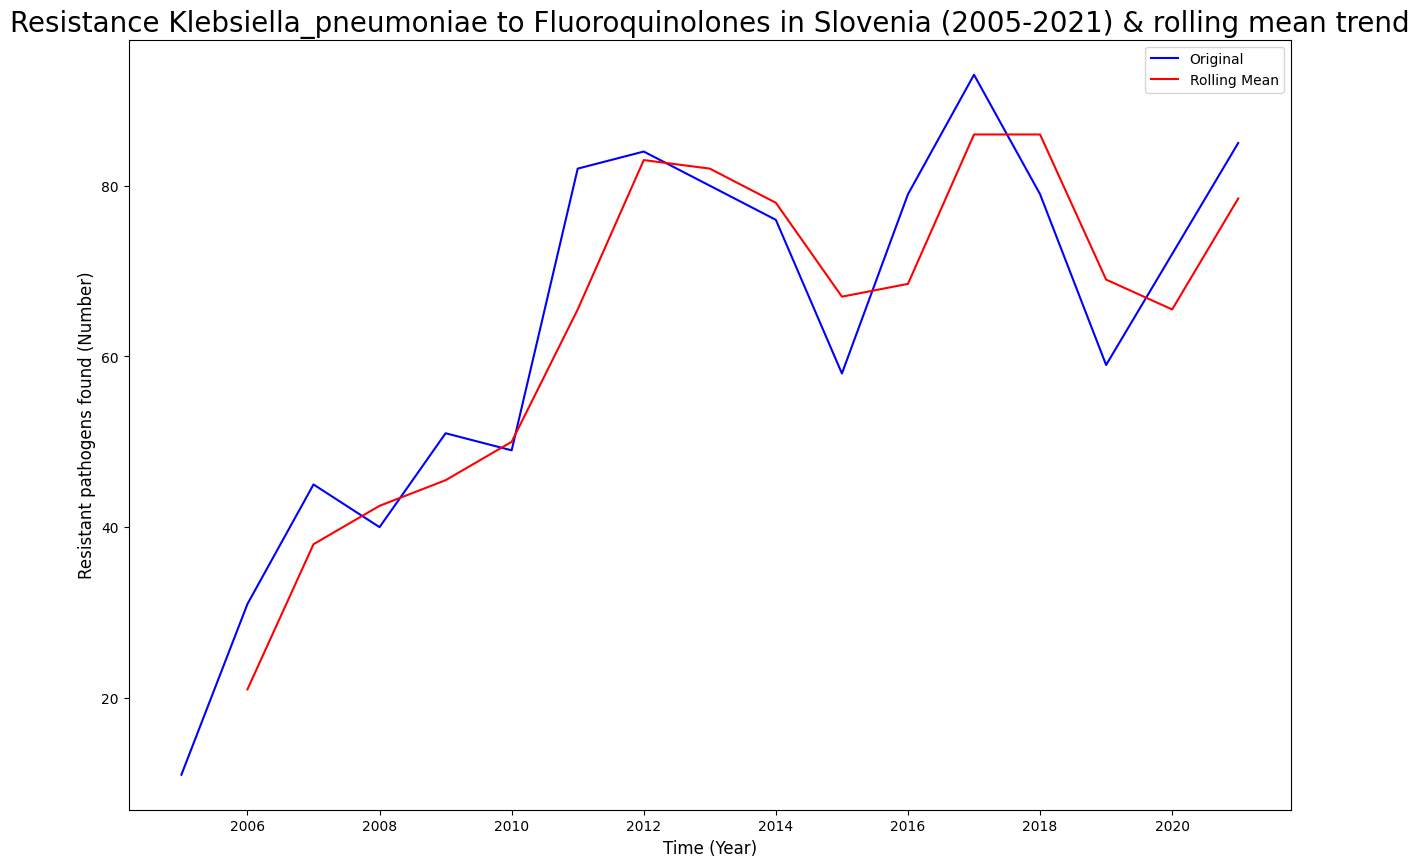

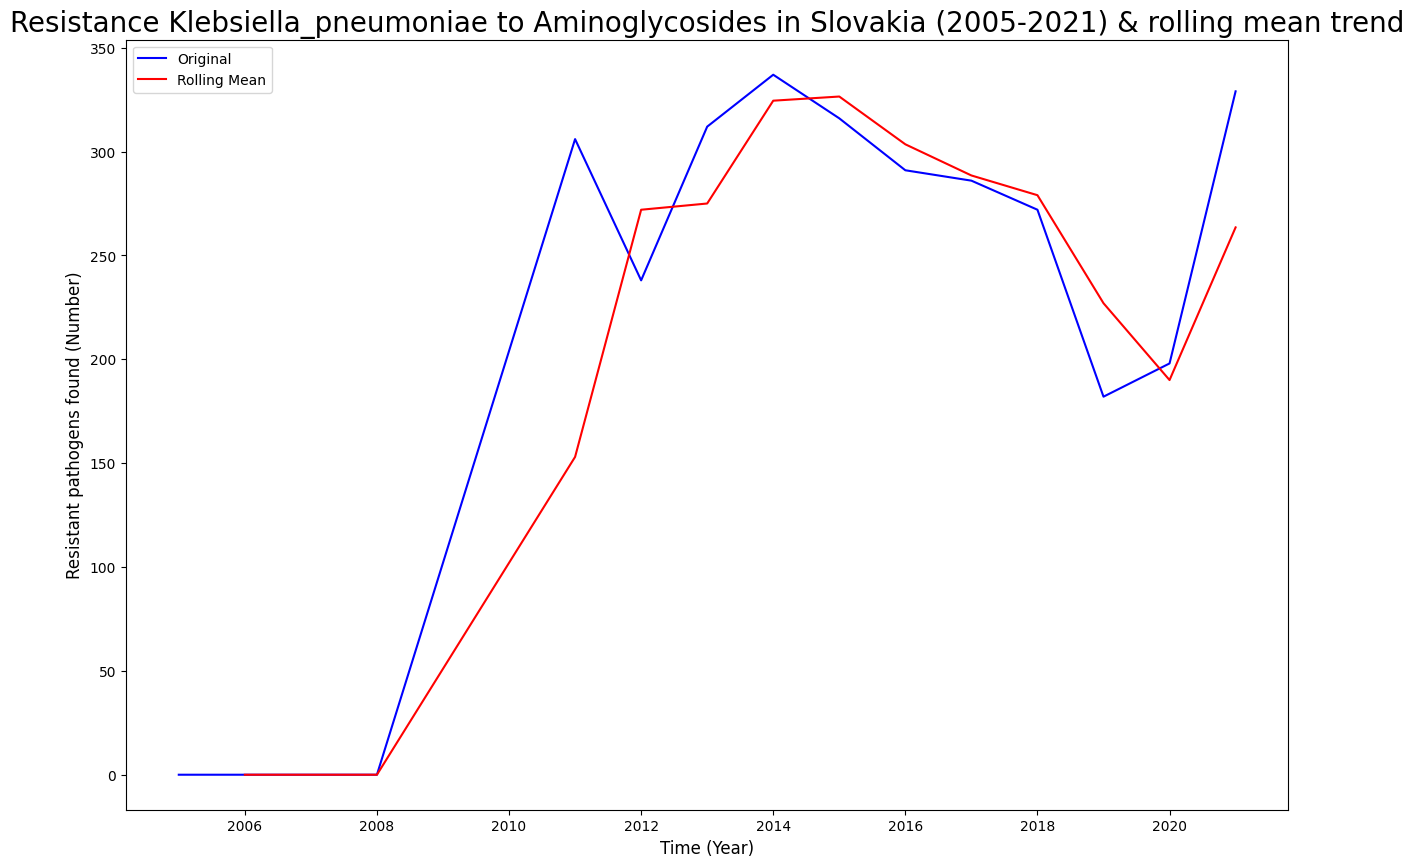

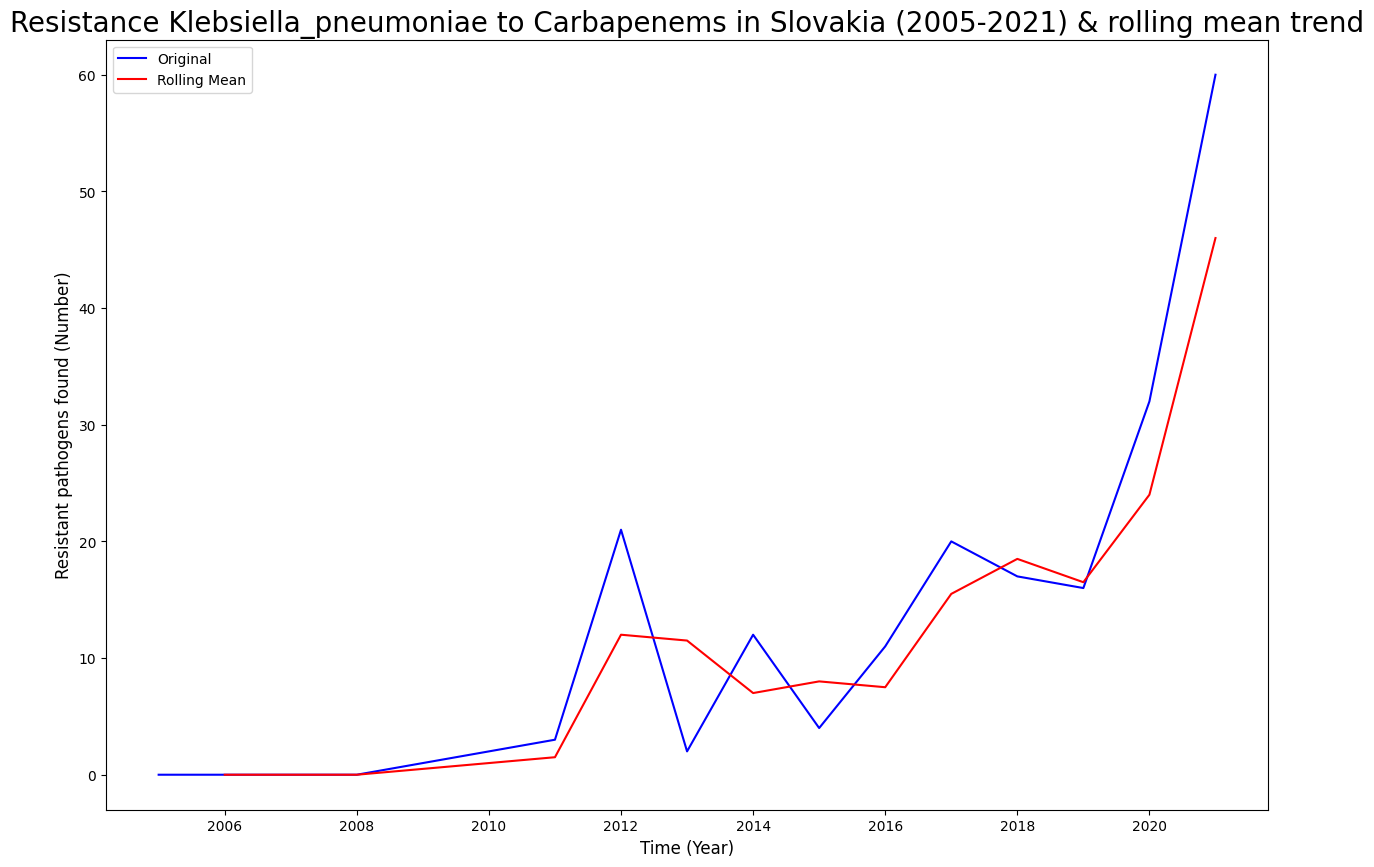

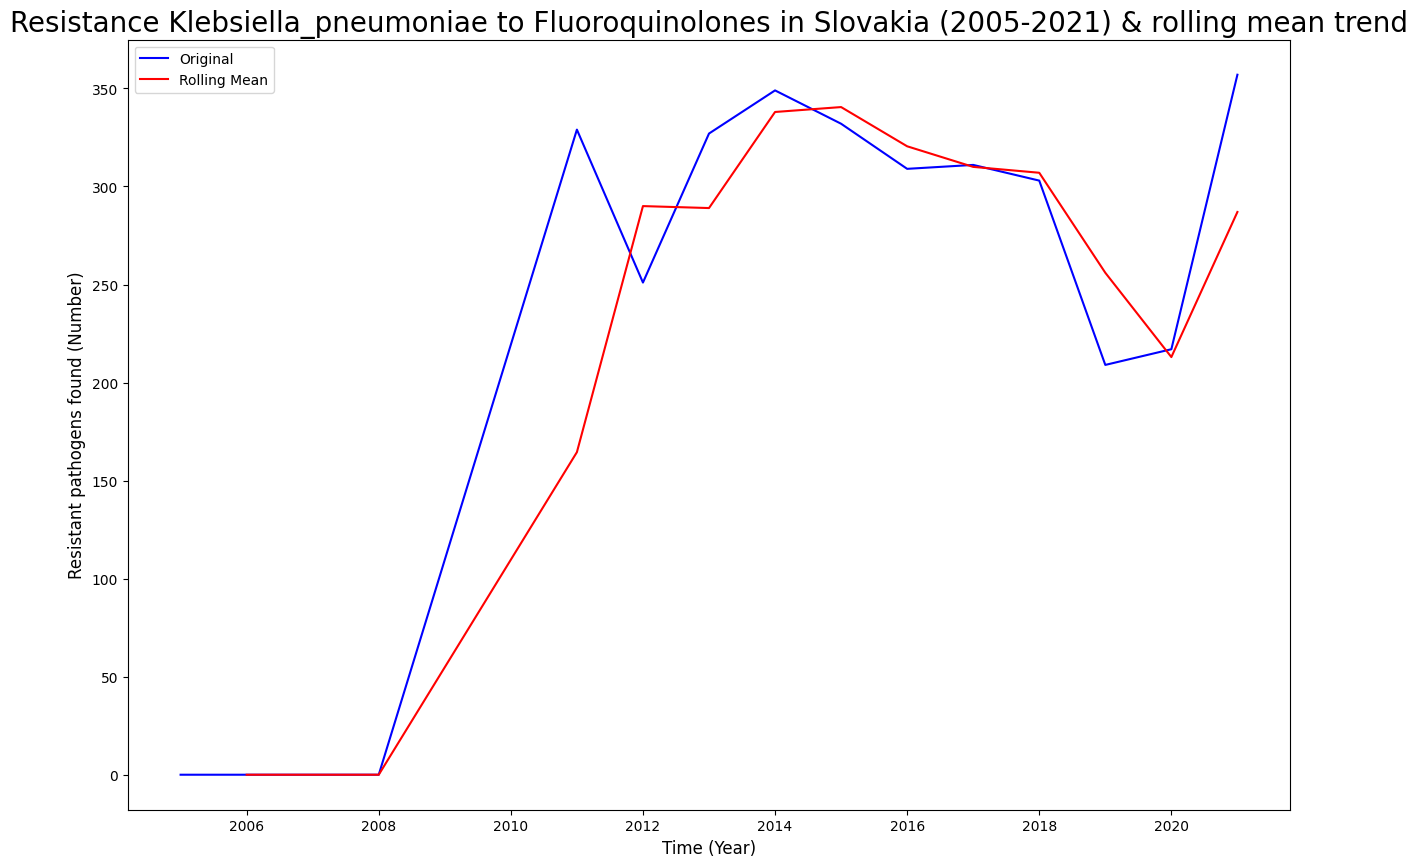

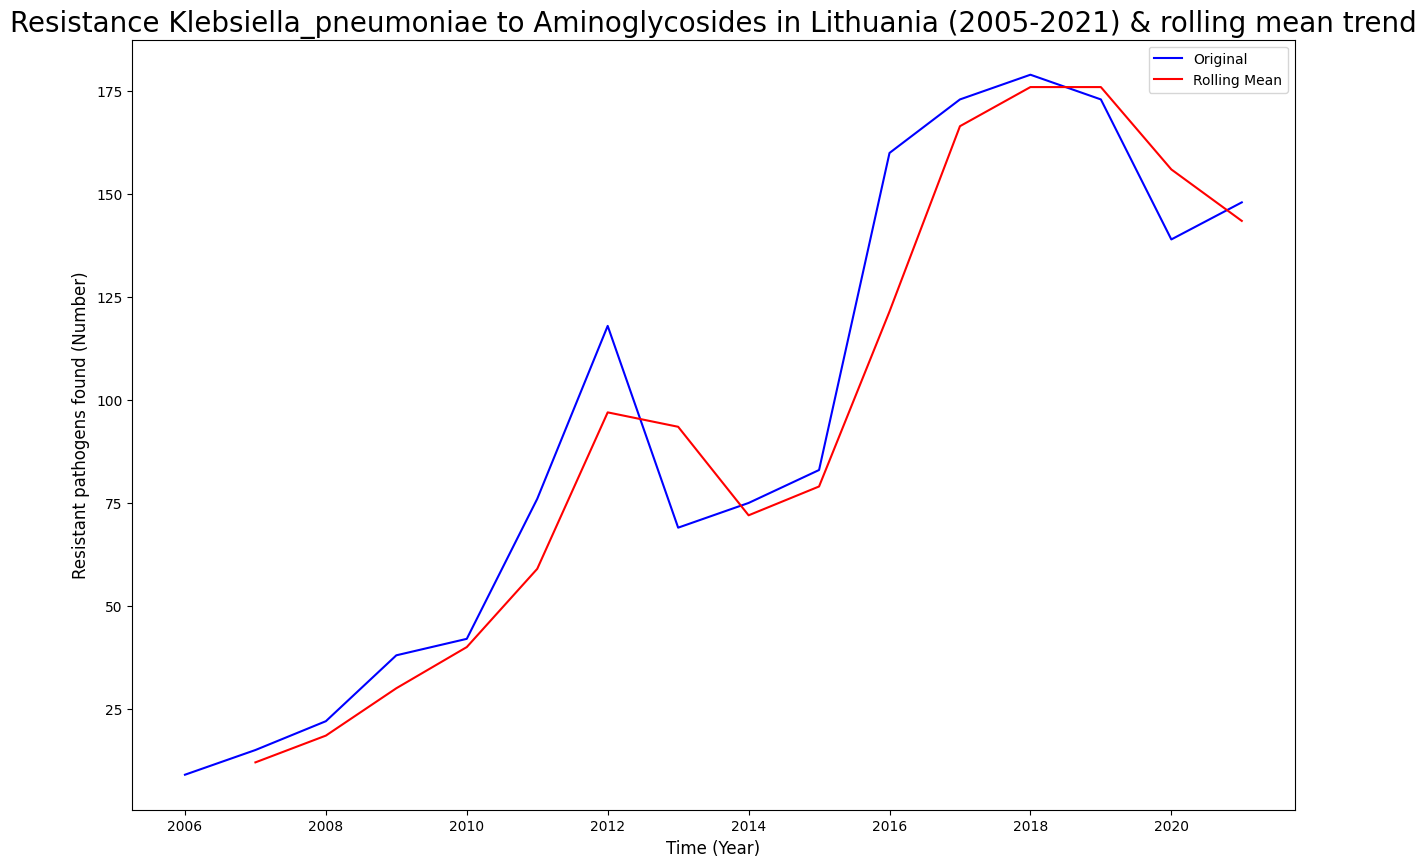

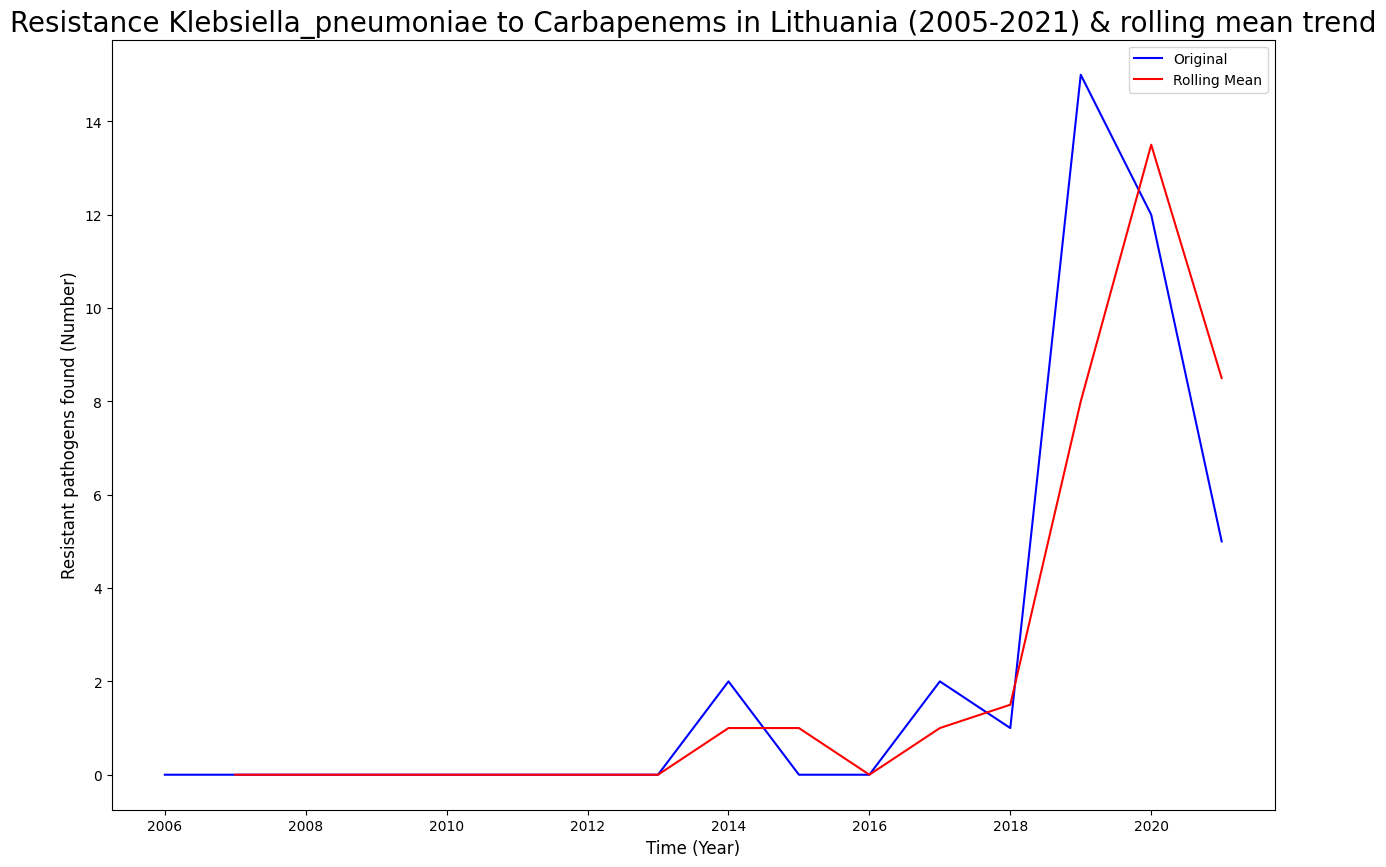

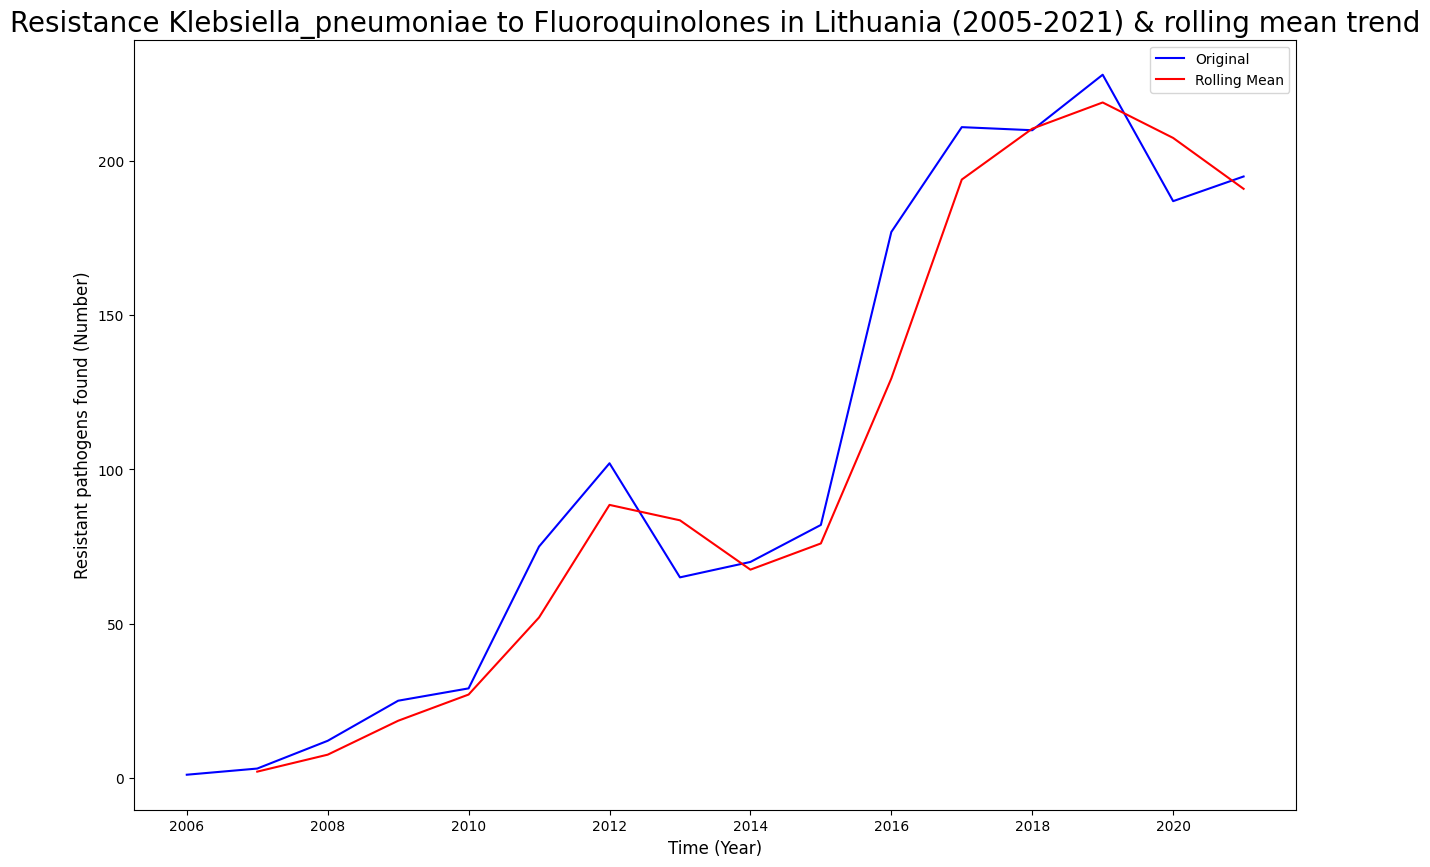

In [6]:
# Get unique countries and unique antimicrobials
list_of_countries= df_combined_Klebsiella_pneumoniae.RegionName.unique()
list_of_antimicrobials_t= df_combined_Klebsiella_pneumoniae.resistant_to.unique()
# Third_generation_cephalosporins & combined resistance seem to have some inconsistencies/ data lack and thus will not be included 
list_of_antimicrobials_t= np.delete(list_of_antimicrobials_t, [0,3])
# Emptylist that will be filled after removing the spaces/dashes between the words
list_of_antimicrobials = []
# Remove spaces, dashes, parenthesis from existing names
for i in list_of_antimicrobials_t:
    j = i.replace(' ','_').replace('-','_')
    list_of_antimicrobials.append(j)
# For Acinetobacter spp.
temp_resistant_Klebsiella_pneumoniae = df_combined_Klebsiella_pneumoniae[df_combined_Klebsiella_pneumoniae['Indicator'] == 'R - resistant isolates']
# storing the name of the dfs
df_names = []
# Save temporary filtered df
for country in list_of_countries:
    for medicine in list_of_antimicrobials:
        df_temp= globals()[f'df_{country}_Klebsiella_pneumoniae_{medicine}']= temp_resistant_Klebsiella_pneumoniae[(temp_resistant_Klebsiella_pneumoniae['RegionName']==f'{country}') & (temp_resistant_Klebsiella_pneumoniae['resistant_to'] == f'{medicine}')]
        # Make a list of dfs
        df_names.append(df_temp)
        rolling_mean = df_temp['NumValue'].rolling(window = 2).mean()
        plt.figure(figsize=(15, 10))
        plt.plot(df_temp['Time'],df_temp['NumValue'], color= 'blue', label = 'Original')
        plt.plot(df_temp['Time'], rolling_mean,  color = 'red', label = 'Rolling Mean')
        plt.title (f'Resistance Klebsiella_pneumoniae to {medicine} in {country} (2005-2021) & rolling mean trend', fontsize= 20)
        plt.xlabel('Time (Year)', fontsize= 12)
        plt.ylabel('Resistant pathogens found (Number)', fontsize= 12)
        plt.legend(loc = 'best')
        plt.savefig(f'C:/Users/franc/resistance_capstone/Antibiotics/eea-bacterial-resistance/{country}_{medicine}.jpg')

